<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Javad Hezareh 
    
    
____


### Full Name : Bahar Dibaei Nia
### Student Number : 99105442
___

# Problem
In this assignment our goal is to develop a framework for simple neural networks, multi layer perceptrons. We are going to use only `numpy` and no other packages to build our own classes and network.

# Setup

In [1]:
###################################
#  Do Not Add any other packages  #
###################################

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import tqdm
import copy
from utils import *

plt.style.use('ggplot')

# Section 1: Modules implementation (65 Points)
We are going to implement required modules for a neural net. Each of this modules must implement the neccessery functions, `_forward` and `backward`. In the following parts, we will implement `LinearLayer`, `ReLU` and `SoftMax` layers.

## Layers

#### Linear Layer (10 Points)

In [2]:
class LinearLayer(Module):
    """
    A linear layer module which calculate (Wx + b).
    """

    def __init__(self, dim_in, dim_out, initializer, reg, alpha):
        """
        Args:
            - dim_in: input dimension,
            - dim_out: output dimension,
            - initializer: a function which get (dim_in, dim_out) and initialize
                a [dim_in x dim_out] matrix,
            - reg: L2-regularization flag
            - alpha: L2-regularization coefficient
        """
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.params = {
            #########################################
            ##          Initialize parameters      ##
            ##              Your Code              ##
            #########################################
            'W': initializer(dim_in, dim_out),
            'b': initializer(1, dim_out)
        }
        
        self.grads = dict()
        self.cache = dict()
        
        self.reg = reg
        self.alpha = alpha

    def _forward(self, x):
        """
        linear forward function, calculate Wx+b for a batch of data

        Args:
            x : a batch of data

        Note:
            you need to store some values in cache to be able to
            calculate backward path.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        self.cache['x'] = x
        
        y = x @ self.params['W'] + self.params['b']
                
        return y

    def backward(self, upstream):
        """
        get upstream gradient and returns downstream gradient

        Args:
            upstream : upstream gradient of loss w.r.t module output

        Note:
            you need to calculate gradient of loss w.r.t module input
            and parameters and store them in grads.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        
        grad_b = np.sum(upstream, axis=0)
        grad_w = self.cache['x'].T @ upstream
        grad_x = upstream @ self.params['W'].T
        grad_reg = 2 * self.alpha * self.params['W'] if self.reg else 0
        
        self.grads = {
            'W': grad_w,
            'b': grad_b,
            'x': grad_x,
            'reg': grad_reg
        }


In [3]:
# sanity check, output must be from o(e-5)
initializer = lambda x, y: np.random.normal(size=(x, y))
linear = LinearLayer(5, 10, initializer, reg=True, alpha=0.001)
check_gradient_linear(linear, h=0.00001)

Gradient of loss w.r.t output:
[[0.82955535 0.21114721 0.29056745 0.76196253 0.48381119 0.26313752
  0.17058744 0.68924104 0.14521547 0.36108282]
 [0.17969557 0.61131998 0.90547691 0.09465278 0.04351438 0.82898441
  0.53347611 0.25746229 0.83709683 0.91589097]
 [0.95338569 0.53886974 0.68147718 0.14543317 0.36605854 0.25725115
  0.64065521 0.99467217 0.84735271 0.6116583 ]
 [0.6585274  0.09264464 0.55180917 0.84839143 0.74920247 0.66146217
  0.48228694 0.96546312 0.48159736 0.23890255]
 [0.62490249 0.71391215 0.39654666 0.08349731 0.25206548 0.14235356
  0.84943899 0.30579129 0.18025764 0.72632517]
 [0.07006783 0.77688796 0.90754448 0.97929669 0.15398316 0.39885902
  0.85437948 0.42579468 0.34963434 0.91473698]
 [0.92071169 0.33599422 0.31872931 0.63541889 0.58434891 0.17077758
  0.11395208 0.59733395 0.64102327 0.2976854 ]
 [0.36232214 0.94163488 0.10551311 0.04220206 0.55321597 0.03134844
  0.82945429 0.71557495 0.4421455  0.89943093]
 [0.15358404 0.01888662 0.93738637 0.70363497 0.2

#### ReLU Layer (5 Points)

In [4]:
class ReLU(Module):
    """
    Rectified Linear Unit function
    """

    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        applies relu function on x

        Args:
            x : a batch of data

        Returns:
            y : relu of input
        """
        #########################################
        ##              Your Code              ##
        #########################################
        self.cache['x'] = x
        y = np.maximum(x, 0)
        return y

    def backward(self, upstream):
        """
        calculate and store gradient of loss w.r.t module input

        Args:
            upstream : gradient of loss w.r.t modele output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_x = 1. * (self.cache['x'] >= 0) * upstream

        self.grads['x'] = grad_x


In [18]:
# sanity check - output must be from o(e-8)
relu = ReLU()
check_gradient_relu(relu)

Gradient of loss w.r.t output:
[[0.0584373  0.88325126 0.26846461 0.89464548 0.50320908]
 [0.09177401 0.38804983 0.72265477 0.53096799 0.3455338 ]
 [0.24378035 0.21950653 0.93640053 0.87820106 0.33644566]
 [0.87531923 0.36254974 0.54245228 0.95475059 0.96677731]
 [0.52121319 0.0189511  0.32733035 0.67793154 0.20010495]
 [0.7436883  0.46844046 0.26309046 0.4595906  0.83244012]
 [0.62944357 0.72287473 0.73348264 0.21539666 0.77413853]
 [0.20357441 0.51746258 0.75884962 0.6687436  0.51406511]
 [0.71992879 0.77988594 0.72842911 0.12522849 0.8795159 ]
 [0.64932805 0.24568954 0.25430494 0.42654584 0.25253977]]
Gradient of loss w.r.t input:
[[0.         0.88325126 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.93640053 0.         0.33644566]
 [0.87531923 0.36254974 0.         0.         0.96677731]
 [0.52121319 0.0189511  0.         0.67793154 0.20010495]
 [0.         0.46844046 0.26309046 0.         0.        ]
 [0.629443

#### SoftMax Layer (15 Points)

We could have a layer that calculate softmax for us. In other word, for input $x\in\mathcal{R}^N$ it would return $y\in\mathcal{R}^n$ where $y_i = \frac{e^{x_i}}{\sum e^{x_i}}$. But this method is not numerical stable because $e^{x_i}$ in this formulation can get very large easly and return `nan`. Instead of that we will implement a logarithmic version of softmax which instead of calculating $\frac{e^{x_i}}{\sum e^{x_i}}$, we will calculate $\log\left(\frac{e^{x_i}}{\sum e^{x_i}}\right) = x_i - \log\sum e^{x_i}$. In order to calculate second term you can use `np.logaddexp` but this function only works on two input. For more than two input, fill in the following function to be able to calculate log sum exp of an array of shape (b,n). `axis=1` means sum over columns and `axis=0` sum over rows.

In [5]:
def logsumexp(array, axis=1):
    """
    calculate log(sum(exp(array))) using np.logaddexp

    Args:
        array : input array
        axis : reduce axis, 1 means columns and 0 means rows
    """
    assert len(array) >= 2
    #########################################
    ##              Your Code              ##
    #########################################
    return np.logaddexp.reduce(array, axis)

In [6]:
class LogSoftMax(Module):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        get x and calculate softmax of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : log softmax of x with shape (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        self.cache['x'] = x
        
        sum_e = logsumexp(x)
        
        row = sum_e.shape[0] 
        
        y = x - sum_e.reshape((row, 1))
        
        self.cache['softmax'] = y
        
        
        return y
    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with sahpe (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        exp_x = np.exp(self.cache['x'])
        grad_x = (upstream.T - (((upstream.sum(axis = 1)*(1/exp_x.sum(axis=1))).T*exp_x.T).T).T).T
        
        self.grads['x'] = grad_x


In [7]:
# sanity check, output must be from o(e-7)
sm = LogSoftMax()
check_gradient_softmax(sm)

Gradient of loss w.r.t output:
[[0.1630331  0.13488387 0.64710355 0.267412   0.38909318]
 [0.17558247 0.28087961 0.28324271 0.94903849 0.49365313]
 [0.66110396 0.48183119 0.81942941 0.72267524 0.05972474]
 [0.23687506 0.58419898 0.63517021 0.34454597 0.22345524]
 [0.88441083 0.96840966 0.22989379 0.11408372 0.45871137]
 [0.00832097 0.74025973 0.43923602 0.0739073  0.96269913]
 [0.17190485 0.1383921  0.6479173  0.88009471 0.35911365]
 [0.42453736 0.08015594 0.24649505 0.0371008  0.95956135]
 [0.14149331 0.25348514 0.93081829 0.36581357 0.52428419]
 [0.23683714 0.9252707  0.18926396 0.4527474  0.47814843]]
Gradient of loss w.r.t input:
[[-0.25543381 -0.14106689  0.41398    -0.12588516  0.10840584]
 [-0.20376161 -0.15868754 -0.08018071  0.43744502  0.00518484]
 [ 0.11956483  0.16874444  0.31243645 -0.01058303 -0.59016269]
 [-0.09121993  0.20407432  0.31101343  0.00085981 -0.42472763]
 [ 0.28037124  0.35101985 -0.11664377 -0.4851247  -0.02962261]
 [-0.29306479  0.21679663 -0.12605471 -0.46

## Model (10 Points)
We need a model class which gathers our layers togather and performs forward and backward on all of them.

In [34]:
class MLPModel(Module):
    """
    A multilayer neural network model
    """

    def __init__(self, layers):
        """
        Args:
            layers : list of model layers
        """
        self.layers = layers

    def _forward(self, x):
        """
        Perform forward on x

        Args:
            x : a batch of data

        Returns:
            o : model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for l in self.layers:
            x = l(x)
        return x
    
    def backward(self, upstream):
        """
        Perform backward path on whole model

        Args:
            upstream : gradient of loss w.r.t model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for l in list(self.layers)[::-1]:
            l.backward(upstream)
            upstream = l.grads['x']
            
        return upstream

    def get_parameters(self):
        """
        Returns:
            parametric_layers : all layers of model which have parameter
        """
        return [layer for layer in self.layers if hasattr(layer, 'params')]

## Loss functions (10 Points)
We need to implement loss functions to be able to train our network. We will implement CrossEntropy loss function. But notice that we have implemented `LogSoftMax` in logarithmic way so input of the following class will be logarithm of probabilities. 

In [35]:
class CrossEntropyLoss(Module):
    def __init__(self, mean=False):
        self.mean = mean
        self.cache = dict()
        self.grads = dict()

    def _forward(self, logprobs, targets):
        """
        Calculate cross entropy of inputs.

        Args:
            probs : matrix of probabilities with shape (b,n)
            targets : list of samples classes with shape (b,)

        Returns:
            y : cross entropy loss
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = -logprobs[list(range(len(targets))), targets]
        
        self.cache['logprobs'] = logprobs
        self.cache['targets'] = targets
        
        return y

    def backward(self, upstream):
        """
        Calculate gradient of loss w.r.t module input and save them in grads.

        Args:
            upstream : gradient of loss w.r.t module output (loss)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        targets = self.cache['targets']
        gr = np.zeros_like(self.cache['logprobs'])
        for i in range(len(targets)):
                gr[i][targets[i]]=-1
                
        grad_scores = gr * upstream
        print('shape',upstream)

        
        self.grads['x'] = grad_scores

In [36]:
# check gradient, output must be from o(e-10)
ce = CrossEntropyLoss()
check_gradient_ce(ce, h=0.0001)

shape 1
Gradient of loss w.r.t output:
1
Gradient of loss w.r.t input:
[[ 0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0. -1.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.]]
Relative error of delta-loss:
4.813857645835871e-14


## Optimization (15 Points)

Now that we have our network and loss function, we need to update model paremeters. We can do so by using `Optimizer` class that perform updating rule on model parameters. You need to implement `sgd` and `momentum` strategy for this optimizer. Becarefull to consider regularization update for linear units that require regularization.

In [89]:
class Optimizer():
    """
    Our main optimization class.
    
    You can add arguments to _sgd and _momentum function if you need to do so, and
    pass this arguments to step function when using optimizer. Don't change __init__
    or step function.
    """

    def __init__(self, layers, strategy, lr):
        """
        save layers here in order to update their parameters later.

        Args:
            layers : model layers (those that we want to update their parameters)
            strategy : optimization strategy
            lr : learning rate
        """
        self.layers = layers
        self.strategy = strategy
        self.lr = lr
        self.strategies = {
            'sgd': self._sgd,
            'momentum': self._momentum,
        }

    def step(self, *args):
        """
        Perform updating strategy on all layers paramters.
        """
        self.strategies[self.strategy](*args)

    def _sgd(self):
        """
        Perform sgd update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for l in self.layers:
            for param in ['W','b']:
                layer.grads[param] /= 64
            for param in ['W','b']:
                l.params[param] -= self.lr * l.grads[param]
            if l.reg:
                l.params['W'] -= self.lr * l.grads['reg']
            
    
    def _momentum(self, momentum):
        """
        Perform momentum update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        ########################################
        if not hasattr(self, 'change'):
            self.change = [{'W':0,'b':0} for layer in self.layers]
            
        for layer in self.layers:
            for param in ['W','b']:
                layer.grads[param] /= 64
            

        for i, layer in enumerate(self.layers):
            new_grad = layer.grads
            new_change = {'W':0,'b':0}
            for param in ['W','b']:
                # Calculate momentum gradient
                new_change[param] = new_grad[param] * momentum + (1 - momentum ) * self.change[i][param]
                layer.params[param] -= new_change[param] * self.lr
            if layer.reg:
                layer.params['W'] -= self.lr * layer.grads['reg']
                
            self.change[i] = new_change
                


# Section 2: CIFAR-10 Classification (35 Points)

Now that we can build a neural network we want to solve CIFAR-10 classification problem. This dataset consists of 60000 $32 \times 32$ coloured images in 10 classes.

## Data preparation (5 Points)

In [36]:
#################################################
##      Run this cell to download dataset      ##
##         the dataset is about 150 MB         ##
#################################################
!./cifar10_downloader.bash

In [38]:
#############################################
##      Run this cell to load dataset      ##
#############################################
data = load_dataset(train_num=4000, test_num=1000)

for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (4000, 32, 32, 3)
Y_train: (4000,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)


In [39]:
##############################################
##      Split train set to train/val        ##
################[Your Code]###################
n = data['X_train'].shape[0]
n_tr = int (0.8*n)
indices = np.random.permutation(n)
train_x = data['X_train'][indices[:n_tr]]
train_y = data['Y_train'][indices[:n_tr]]
val_x = data['X_train'][indices[n_tr:]]
val_y = data['Y_train'][indices[n_tr:]]

data['X_train'] = train_x
data['Y_train'] = train_y
data['X_val'] = val_x
data['Y_val'] = val_y


##############################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (3200, 32, 32, 3)
Y_train: (3200,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_val: (800, 32, 32, 3)
Y_val: (800,)


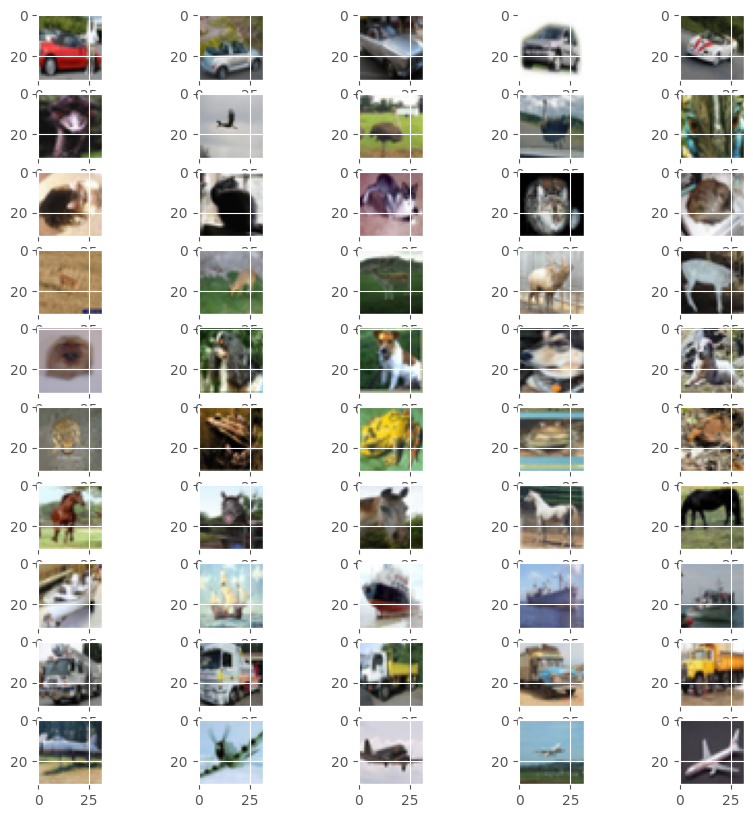

In [40]:
##################################################
##      Visualize 5 samples from each class     ##
##################[Your Code]#####################
visited=np.array([0 for i in range(10)])
fig, ax = plt.subplots(10, 5, figsize=(10,10))
for i in range(len(data['Y_train'])):
    if visited[data['Y_train'][i]] < 5:
        visited[data['Y_train'][i]] += 1
        ax[data['Y_train'][i]-1,visited[data['Y_train'][i]]-1].imshow(data['X_train'][i])
    if  (visited == np.array([5 for i in range(10)])).all():
        break


In [41]:
#####################################################
##             Normalize and flatten X             ##
####################[Your Code]######################
for k in data.keys():
    dataset = data[k]
    if 'X' in k:
        dataset = np.array([dataset[i].flatten() for i in range(dataset.shape[0])])
        dataset -= np.mean(dataset, axis=0)
        dataset /= np.std(dataset, axis=0)
        data[k] = dataset



#####################################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (3200, 3072)
Y_train: (3200,)
X_test: (1000, 3072)
Y_test: (1000,)
X_val: (800, 3072)
Y_val: (800,)


## Train and Test Model (25 Points)

### Batch Sampler
We need to sample bathces from our dataset to train model. Complete the following class to have a random sampler.

In [42]:
class RandomSampler(object):
    def __init__(self, batch_size, dataset, type):
        """
        Args:
            batch_size : sampler batch size
            dataset : dataset we want to get batch from that
            type : one of {'train', 'test', 'val'}
        """
        self.batch_size = batch_size
        self.dataset = dataset
        self.x_key = f'X_{type}'
        self.y_key = f'Y_{type}'
        self.indices = []
        ################################################################
        ##       Build batches indices and store them in indices      ##
        ##          Also store number of batches in num_batches       ##
        ##                          Your Code                         ##
        ################################################################
        idx_per = np.random.permutation(len(dataset[self.x_key]))
        cur=0
        while cur < len(idx_per)-1:
            if cur + self.batch_size >= len(idx_per):
                self.indices.append(idx_per[cur:])
                break
            self.indices.append(idx_per[cur: cur + self.batch_size])
            cur += self.batch_size
        self.num_batches = len(self.indices)

    def __len__(self):
        assert type(self.num_batches) == int
        return self.num_batches

    def __iter__(self):
        """
        This function call when we iterate an object of this class and
        yields one batch on each call.

        Yields:
            (x, y) : tuple of bathces of x and y
        """
        for idx in self.indices:
            x = self.dataset[self.x_key][idx]
            y = self.dataset[self.y_key][idx]
            yield x, y


Fill the following functions to update a confusion matrix and calculate f1 score for a confusion matrix. For multi class f1 score read [here](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1).

In [43]:
def update_confusion_matrix(conf_matrix, preds, reals):
    """
    Updates confusion matrix

    Args:
        conf_matrix : input confusion matrix
        preds : array of predicted labels
        reals : array of real labels

    Returns:
        conf_matrix : updated confusion matrix
    """
    #################################
    ##          Your Code          ##
    #################################
    for i in range(len(preds)):
        conf_matrix[preds[i], reals[i]] += 1

    return conf_matrix


def f1_score(confusion_matrix):
    """
    calculate macro f1 score from given confusion matrix

    Args:
        confusion_matrix : given confusion matrix
        
    Returns:
        f1 : macro f1 score
    """
    #################################
    ##          Your Code          ##
    #################################
    f1s = []
    n = confusion_matrix.shape[0]
    for i in range(n):
        TP = confusion_matrix[i][i]
        real_P = np.sum(confusion_matrix[:,i])
        pred_P = np.sum(confusion_matrix[i,:])
        if real_P > 0  and pred_P > 0:
            recall = TP/real_P
            precision = TP/pred_P
            if precision > 0 and recall > 0:
                f1 = 2 * recall * precision / (recall + precision)
                f1s.append(f1)
            else: f1s.append(0)
        else: f1s.append(0)
        
    
    
    
    
    f1_score = np.mean(np.array(f1s))
    
    
    return f1_score

### Define Model
Define an MLP model to solve classification problem.

In [90]:
###############################################
##             Define your model             ##
##     use a good initializer for layers     ##
###############################################
import math

reg_coeff = 0.005


input_size = data['X_train'].shape[1]

units = [
    input_size,
    128,
    64,
    32,
    10
]


all_layers = [
    [LinearLayer(units[i], units[i+1], 
                 #He Initialization
               lambda in_, out_: np.random.normal(scale=math.sqrt(1/out_), size=(in_, out_)), reg=True, alpha=reg_coeff),
     ReLU()]
    for i in range(len(units) - 1)
    ]
layers = [inner for outer in all_layers for inner in outer]
layers = layers[:-1]
layers += [LogSoftMax()]





model = MLPModel(layers)

In [91]:
#########################################
##          Hyper parameters           ##
#########################################

n_epochs = 100
batch_size = 64
lr = 0.1

In [92]:
##################################################
##      Define optimizer, loss and sampler      ##
##################################################

optimizer = Optimizer(model.get_parameters(), 'momentum', lr)
criterion = CrossEntropyLoss()
train_sampler = RandomSampler(batch_size, data, 'train')
val_sampler = RandomSampler(batch_size, data, 'val')
test_sampler = RandomSampler(batch_size, data, 'test')

### Train Model

Fill in the below cell to train the model. Store each epoch loss, accuracy and f1-score. Use f1-score to choose best epoch.

**Note1**: To do backpropagation you need to first call `backward` function of criterion with 1 as its argument to have gradient of loss w.r.t output of this module and then using model `backward` function with `criterion.grads['x']` argument.

**Note2**: You can ignore regularization term in your total loss value and just use criterion, but you must consider that during updating.

In [93]:
#########################################
##      Train and Validation loop      ##
#########################################
train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_f1, val_f1 = [], []
best_model = None
best_f1 = 0

for epoch in range(n_epochs):
    
    # Train Phase
    total_loss = 0
    correct = 0
    N = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(train_sampler), total=len(train_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            logprobs = model(x)
            loss = np.sum(criterion(logprobs, y))
            total_loss += loss
            criterion.backward(1)
            model.backward(criterion.grads['x'])
            optimizer.step(0.9)
            
            N += len(y)
            preds = np.argmax(logprobs, axis=1)
            correct += np.sum((preds == y)) 
            confusion = update_confusion_matrix(confusion, preds, y)
            
            acc = correct/N
            f1 = f1_score(confusion)
            
            pbar.set_description(f'Train {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for train phase
    train_losses.append(total_loss/N)
    train_accs.append(acc)
    train_f1.append(f1)
    

    # Validation Phase
    total_loss = 0
    correct = 0
    N = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(val_sampler), total=len(val_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            logprobs = model(x)
            loss = np.sum(criterion(logprobs, y))
            total_loss += loss
            N += len(y)
            preds = np.argmax(logprobs, axis=1)
            correct += np.sum((preds == y)) 
            confusion = update_confusion_matrix(confusion, preds, y)
            
            acc = correct/N
            f1 = f1_score(confusion)
            pbar.set_description(f'Val   {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for validation phase
    val_losses.append(total_loss/N)
    val_accs.append(acc)
    val_f1.append(f1)
    
    
    #################################
    ##       update best model     ##
    ##          Your Code          ##
    #################################
    if f1 > best_f1:
        best_model = model
        best_f1 = f1
    
    
    print(f'----------------------------[Epoch{epoch+1} finished!]----------------------------')

Train 0 | Loss:7.94e+00 | Acc: 0.10| F1: 0.08|:   6%|██                                 | 3/50 [00:00<00:01, 26.14it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 0 | Loss:4.76e+00 | Acc: 0.11| F1: 0.09|:  24%|████████▏                         | 12/50 [00:00<00:01, 35.61it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 0 | Loss:3.94e+00 | Acc: 0.12| F1: 0.09|:  32%|██████████▉                       | 16/50 [00:00<00:00, 36.10it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 0 | Loss:3.56e+00 | Acc: 0.13| F1: 0.10|:  52%|█████████████████▋                | 26/50 [00:00<00:00, 37.33it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 0 | Loss:3.27e+00 | Acc: 0.13| F1: 0.09|:  68%|███████████████████████           | 34/50 [00:00<00:00, 36.74it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 0 | Loss:3.14e+00 | Acc: 0.14| F1: 0.10|:  76%|█████████████████████████▊        | 38/50 [00:01<00:00, 33.62it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 0 | Loss:3.09e+00 | Acc: 0.14| F1: 0.10|:  84%|████████████████████████████▌     | 42/50 [00:01<00:00, 29.53it/s]

shape 1
shape 1
shape 1
shape 1


Train 0 | Loss:2.98e+00 | Acc: 0.15| F1: 0.11|:  92%|███████████████████████████████▎  | 46/50 [00:01<00:00, 27.26it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 0 | Loss:2.97e+00 | Acc: 0.14| F1: 0.10|: 100%|██████████████████████████████████| 50/50 [00:01<00:00, 31.63it/s]


shape 1


Val   0 | Loss:2.25e+00 | Acc: 0.16| F1: 0.10|: 100%|██████████████████████████████████| 13/13 [00:00<00:00, 58.84it/s]


----------------------------[Epoch1 finished!]----------------------------


Train 1 | Loss:2.23e+00 | Acc: 0.15| F1: 0.11|:   6%|██                                 | 3/50 [00:00<00:01, 28.22it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 1 | Loss:2.18e+00 | Acc: 0.20| F1: 0.13|:  18%|██████▎                            | 9/50 [00:00<00:01, 24.20it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 1 | Loss:2.20e+00 | Acc: 0.20| F1: 0.14|:  24%|████████▏                         | 12/50 [00:00<00:01, 23.47it/s]

shape 1
shape 1
shape 1
shape 1


Train 1 | Loss:2.20e+00 | Acc: 0.20| F1: 0.14|:  36%|████████████▏                     | 18/50 [00:00<00:01, 23.18it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 1 | Loss:2.19e+00 | Acc: 0.19| F1: 0.13|:  42%|██████████████▎                   | 21/50 [00:00<00:01, 22.69it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 1 | Loss:2.18e+00 | Acc: 0.20| F1: 0.14|:  58%|███████████████████▋              | 29/50 [00:01<00:00, 28.45it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 1 | Loss:2.18e+00 | Acc: 0.20| F1: 0.15|:  78%|██████████████████████████▌       | 39/50 [00:01<00:00, 34.53it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 1 | Loss:2.17e+00 | Acc: 0.20| F1: 0.15|:  96%|████████████████████████████████▋ | 48/50 [00:01<00:00, 38.60it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 1 | Loss:2.17e+00 | Acc: 0.20| F1: 0.15|: 100%|██████████████████████████████████| 50/50 [00:01<00:00, 30.26it/s]


shape 1


Val   1 | Loss:2.20e+00 | Acc: 0.20| F1: 0.15|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 162.50it/s]


----------------------------[Epoch2 finished!]----------------------------


Train 2 | Loss:2.10e+00 | Acc: 0.23| F1: 0.18|:   0%|                                           | 0/50 [00:00<?, ?it/s]

shape 1
shape 1
shape 1


Train 2 | Loss:2.06e+00 | Acc: 0.25| F1: 0.20|:   8%|██▊                                | 4/50 [00:00<00:01, 39.56it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 2 | Loss:2.05e+00 | Acc: 0.26| F1: 0.21|:  16%|█████▌                             | 8/50 [00:00<00:01, 39.02it/s]

shape 1
shape 1


Train 2 | Loss:2.05e+00 | Acc: 0.26| F1: 0.22|:  24%|████████▏                         | 12/50 [00:00<00:01, 36.83it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 2 | Loss:2.06e+00 | Acc: 0.25| F1: 0.21|:  32%|██████████▉                       | 16/50 [00:00<00:00, 36.45it/s]

shape 1
shape 1


Train 2 | Loss:2.06e+00 | Acc: 0.25| F1: 0.21|:  40%|█████████████▌                    | 20/50 [00:00<00:00, 36.23it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 2 | Loss:2.05e+00 | Acc: 0.26| F1: 0.22|:  40%|█████████████▌                    | 20/50 [00:00<00:00, 36.23it/s]

shape 1
shape 1


Train 2 | Loss:2.05e+00 | Acc: 0.26| F1: 0.22|:  56%|███████████████████               | 28/50 [00:00<00:00, 37.65it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 2 | Loss:2.06e+00 | Acc: 0.26| F1: 0.22|:  56%|███████████████████               | 28/50 [00:00<00:00, 37.65it/s]

shape 1
shape 1


Train 2 | Loss:2.05e+00 | Acc: 0.26| F1: 0.22|:  74%|█████████████████████████▏        | 37/50 [00:01<00:00, 39.79it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 2 | Loss:2.05e+00 | Acc: 0.26| F1: 0.23|:  74%|█████████████████████████▏        | 37/50 [00:01<00:00, 39.79it/s]

shape 1
shape 1


Train 2 | Loss:2.04e+00 | Acc: 0.26| F1: 0.23|:  82%|███████████████████████████▉      | 41/50 [00:01<00:00, 38.46it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 2 | Loss:2.04e+00 | Acc: 0.26| F1: 0.23|:  92%|███████████████████████████████▎  | 46/50 [00:01<00:00, 38.90it/s]

shape 1


Train 2 | Loss:2.04e+00 | Acc: 0.26| F1: 0.23|: 100%|██████████████████████████████████| 50/50 [00:01<00:00, 37.54it/s]


shape 1
shape 1
shape 1


Val   2 | Loss:2.10e+00 | Acc: 0.27| F1: 0.25|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 159.76it/s]


----------------------------[Epoch3 finished!]----------------------------


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

shape

Train 3 | Loss:1.88e+00 | Acc: 0.35| F1: 0.33|:  10%|███▌                               | 5/50 [00:00<00:01, 41.26it/s]

 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 3 | Loss:1.88e+00 | Acc: 0.35| F1: 0.32|:  30%|██████████▏                       | 15/50 [00:00<00:00, 41.09it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 3 | Loss:1.88e+00 | Acc: 0.34| F1: 0.31|:  30%|██████████▏                       | 15/50 [00:00<00:00, 41.09it/s]

shape 1


Train 3 | Loss:1.88e+00 | Acc: 0.34| F1: 0.31|:  40%|█████████████▌                    | 20/50 [00:00<00:00, 41.53it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 3 | Loss:1.88e+00 | Acc: 0.34| F1: 0.32|:  40%|█████████████▌                    | 20/50 [00:00<00:00, 41.53it/s]

shape 1


Train 3 | Loss:1.89e+00 | Acc: 0.33| F1: 0.31|:  60%|████████████████████▍             | 30/50 [00:00<00:00, 40.38it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 3 | Loss:1.89e+00 | Acc: 0.33| F1: 0.32|:  70%|███████████████████████▊          | 35/50 [00:00<00:00, 38.00it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 3 | Loss:1.88e+00 | Acc: 0.34| F1: 0.32|:  78%|██████████████████████████▌       | 39/50 [00:01<00:00, 36.65it/s]

shape 1


Train 3 | Loss:1.88e+00 | Acc: 0.34| F1: 0.32|:  86%|█████████████████████████████▏    | 43/50 [00:01<00:00, 36.91it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 3 | Loss:1.88e+00 | Acc: 0.34| F1: 0.32|:  86%|█████████████████████████████▏    | 43/50 [00:01<00:00, 36.91it/s]

shape 1


Train 3 | Loss:1.88e+00 | Acc: 0.34| F1: 0.32|: 100%|██████████████████████████████████| 50/50 [00:01<00:00, 38.83it/s]


shape 1
shape 1
shape 1


Val   3 | Loss:2.03e+00 | Acc: 0.28| F1: 0.27|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 138.58it/s]


----------------------------[Epoch4 finished!]----------------------------


Train 4 | Loss:1.73e+00 | Acc: 0.38| F1: 0.37|:   8%|██▊                                | 4/50 [00:00<00:01, 33.66it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 4 | Loss:1.76e+00 | Acc: 0.36| F1: 0.35|:  28%|█████████▌                        | 14/50 [00:00<00:00, 39.66it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 4 | Loss:1.77e+00 | Acc: 0.35| F1: 0.35|:  36%|████████████▏                     | 18/50 [00:00<00:00, 36.97it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 4 | Loss:1.75e+00 | Acc: 0.37| F1: 0.36|:  52%|█████████████████▋                | 26/50 [00:00<00:00, 37.41it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 4 | Loss:1.76e+00 | Acc: 0.36| F1: 0.36|:  72%|████████████████████████▍         | 36/50 [00:00<00:00, 39.39it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 4 | Loss:1.75e+00 | Acc: 0.37| F1: 0.36|:  82%|███████████████████████████▉      | 41/50 [00:01<00:00, 39.45it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 4 | Loss:1.73e+00 | Acc: 0.37| F1: 0.36|:  98%|█████████████████████████████████▎| 49/50 [00:01<00:00, 33.04it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 4 | Loss:1.73e+00 | Acc: 0.38| F1: 0.37|: 100%|██████████████████████████████████| 50/50 [00:01<00:00, 36.13it/s]
Val   4 | Loss:1.98e+00 | Acc: 0.30| F1: 0.29|: 100%|██████████████████████████████████| 13/13 [00:00<00:00, 77.52it/s]


----------------------------[Epoch5 finished!]----------------------------


Train 5 | Loss:1.53e+00 | Acc: 0.44| F1: 0.43|:   6%|██                                 | 3/50 [00:00<00:01, 26.18it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 5 | Loss:1.61e+00 | Acc: 0.43| F1: 0.42|:  18%|██████▎                            | 9/50 [00:00<00:01, 25.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 5 | Loss:1.65e+00 | Acc: 0.41| F1: 0.40|:  24%|████████▏                         | 12/50 [00:00<00:01, 25.93it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 5 | Loss:1.64e+00 | Acc: 0.41| F1: 0.40|:  36%|████████████▏                     | 18/50 [00:00<00:01, 26.88it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 5 | Loss:1.62e+00 | Acc: 0.42| F1: 0.41|:  48%|████████████████▎                 | 24/50 [00:00<00:00, 27.03it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 5 | Loss:1.63e+00 | Acc: 0.42| F1: 0.41|:  66%|██████████████████████▍           | 33/50 [00:01<00:00, 33.98it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 5 | Loss:1.61e+00 | Acc: 0.43| F1: 0.42|:  86%|█████████████████████████████▏    | 43/50 [00:01<00:00, 37.79it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 5 | Loss:1.60e+00 | Acc: 0.43| F1: 0.42|: 100%|██████████████████████████████████| 50/50 [00:01<00:00, 32.50it/s]


shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Val   5 | Loss:1.96e+00 | Acc: 0.30| F1: 0.28|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 164.58it/s]


----------------------------[Epoch6 finished!]----------------------------


Train 6 | Loss:1.48e+00 | Acc: 0.48| F1: 0.46|:  10%|███▌                               | 5/50 [00:00<00:01, 42.18it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 6 | Loss:1.53e+00 | Acc: 0.46| F1: 0.45|:  28%|█████████▌                        | 14/50 [00:00<00:00, 37.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 6 | Loss:1.52e+00 | Acc: 0.46| F1: 0.45|:  36%|████████████▏                     | 18/50 [00:00<00:00, 35.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 6 | Loss:1.52e+00 | Acc: 0.46| F1: 0.46|:  54%|██████████████████▎               | 27/50 [00:00<00:00, 38.68it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 6 | Loss:1.51e+00 | Acc: 0.47| F1: 0.46|:  74%|█████████████████████████▏        | 37/50 [00:00<00:00, 41.51it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 6 | Loss:1.49e+00 | Acc: 0.48| F1: 0.47|:  84%|████████████████████████████▌     | 42/50 [00:01<00:00, 39.88it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 6 | Loss:1.48e+00 | Acc: 0.48| F1: 0.47|: 100%|██████████████████████████████████| 50/50 [00:01<00:00, 38.88it/s]


shape 1
shape 1
shape 1


Val   6 | Loss:1.94e+00 | Acc: 0.32| F1: 0.31|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 143.00it/s]


----------------------------[Epoch7 finished!]----------------------------


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

shape

Train 7 | Loss:1.36e+00 | Acc: 0.50| F1: 0.49|:   8%|██▊                                | 4/50 [00:00<00:01, 35.33it/s]

 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 7 | Loss:1.42e+00 | Acc: 0.49| F1: 0.48|:  28%|█████████▌                        | 14/50 [00:00<00:00, 41.21it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 7 | Loss:1.43e+00 | Acc: 0.48| F1: 0.48|:  38%|████████████▉                     | 19/50 [00:00<00:00, 39.23it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 7 | Loss:1.42e+00 | Acc: 0.48| F1: 0.48|:  48%|████████████████▎                 | 24/50 [00:00<00:00, 41.33it/s]

shape 1
shape 1


Train 7 | Loss:1.43e+00 | Acc: 0.49| F1: 0.48|:  58%|███████████████████▋              | 29/50 [00:00<00:00, 39.69it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 7 | Loss:1.42e+00 | Acc: 0.49| F1: 0.48|:  58%|███████████████████▋              | 29/50 [00:00<00:00, 39.69it/s]

shape 1
shape 1


Train 7 | Loss:1.43e+00 | Acc: 0.49| F1: 0.49|:  68%|███████████████████████           | 34/50 [00:00<00:00, 38.05it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 7 | Loss:1.42e+00 | Acc: 0.50| F1: 0.49|:  76%|█████████████████████████▊        | 38/50 [00:01<00:00, 38.00it/s]

shape 1
shape 1


Train 7 | Loss:1.41e+00 | Acc: 0.50| F1: 0.49|:  84%|████████████████████████████▌     | 42/50 [00:01<00:00, 36.06it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 7 | Loss:1.40e+00 | Acc: 0.50| F1: 0.50|:  92%|███████████████████████████████▎  | 46/50 [00:01<00:00, 36.49it/s]

shape 1
shape 1
shape 1


Train 7 | Loss:1.40e+00 | Acc: 0.50| F1: 0.50|: 100%|██████████████████████████████████| 50/50 [00:01<00:00, 38.03it/s]


shape 1
shape 1


Val   7 | Loss:1.96e+00 | Acc: 0.32| F1: 0.31|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 165.84it/s]


----------------------------[Epoch8 finished!]----------------------------


Train 8 | Loss:1.25e+00 | Acc: 0.57| F1: 0.57|:   0%|                                           | 0/50 [00:00<?, ?it/s]

shape 1
shape 1


Train 8 | Loss:1.26e+00 | Acc: 0.55| F1: 0.54|:  10%|███▌                               | 5/50 [00:00<00:01, 40.39it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 8 | Loss:1.26e+00 | Acc: 0.55| F1: 0.54|:  10%|███▌                               | 5/50 [00:00<00:01, 40.39it/s]

shape 1


Train 8 | Loss:1.25e+00 | Acc: 0.56| F1: 0.56|:  10%|███▌                               | 5/50 [00:00<00:01, 40.39it/s]

shape 1
shape 1


Train 8 | Loss:1.30e+00 | Acc: 0.54| F1: 0.54|:  20%|██████▊                           | 10/50 [00:00<00:01, 39.36it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 8 | Loss:1.29e+00 | Acc: 0.54| F1: 0.54|:  30%|██████████▏                       | 15/50 [00:00<00:00, 39.91it/s]

shape 1


Train 8 | Loss:1.30e+00 | Acc: 0.54| F1: 0.54|:  30%|██████████▏                       | 15/50 [00:00<00:00, 39.91it/s]

shape 1


Train 8 | Loss:1.31e+00 | Acc: 0.53| F1: 0.53|:  38%|████████████▉                     | 19/50 [00:00<00:00, 38.04it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 8 | Loss:1.30e+00 | Acc: 0.54| F1: 0.53|:  38%|████████████▉                     | 19/50 [00:00<00:00, 38.04it/s]

shape 1


Train 8 | Loss:1.30e+00 | Acc: 0.54| F1: 0.53|:  46%|███████████████▋                  | 23/50 [00:00<00:00, 37.03it/s]

shape 1


Train 8 | Loss:1.30e+00 | Acc: 0.54| F1: 0.54|:  54%|██████████████████▎               | 27/50 [00:00<00:00, 36.20it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 8 | Loss:1.30e+00 | Acc: 0.54| F1: 0.54|:  54%|██████████████████▎               | 27/50 [00:00<00:00, 36.20it/s]

shape 1


Train 8 | Loss:1.30e+00 | Acc: 0.54| F1: 0.54|:  54%|██████████████████▎               | 27/50 [00:00<00:00, 36.20it/s]

shape 1
shape 1


Train 8 | Loss:1.31e+00 | Acc: 0.54| F1: 0.54|:  64%|█████████████████████▊            | 32/50 [00:00<00:00, 36.35it/s]

shape 1
shape 1
shape 1
shape 1


Train 8 | Loss:1.31e+00 | Acc: 0.54| F1: 0.54|:  72%|████████████████████████▍         | 36/50 [00:00<00:00, 36.52it/s]

shape 1


Train 8 | Loss:1.30e+00 | Acc: 0.54| F1: 0.54|:  72%|████████████████████████▍         | 36/50 [00:01<00:00, 36.52it/s]

shape 1
shape 1
shape 1


Train 8 | Loss:1.29e+00 | Acc: 0.55| F1: 0.55|:  80%|███████████████████████████▏      | 40/50 [00:01<00:00, 36.97it/s]

shape 1
shape 1
shape 1
shape 1


Train 8 | Loss:1.29e+00 | Acc: 0.55| F1: 0.55|:  88%|█████████████████████████████▉    | 44/50 [00:01<00:00, 37.71it/s]

shape 1
shape 1
shape 1
shape 1


Train 8 | Loss:1.28e+00 | Acc: 0.55| F1: 0.55|: 100%|██████████████████████████████████| 50/50 [00:01<00:00, 37.75it/s]


shape 1
shape 1


Val   8 | Loss:1.94e+00 | Acc: 0.35| F1: 0.34|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 141.41it/s]


----------------------------[Epoch9 finished!]----------------------------


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

shape 1


Train 9 | Loss:1.16e+00 | Acc: 0.61| F1: 0.60|:   8%|██▊                                | 4/50 [00:00<00:01, 32.90it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 9 | Loss:1.19e+00 | Acc: 0.59| F1: 0.59|:  28%|█████████▌                        | 14/50 [00:00<00:00, 40.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 9 | Loss:1.20e+00 | Acc: 0.58| F1: 0.58|:  38%|████████████▉                     | 19/50 [00:00<00:00, 39.04it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 9 | Loss:1.20e+00 | Acc: 0.58| F1: 0.58|:  38%|████████████▉                     | 19/50 [00:00<00:00, 39.04it/s]

shape

Train 9 | Loss:1.21e+00 | Acc: 0.58| F1: 0.57|:  56%|███████████████████               | 28/50 [00:00<00:00, 39.64it/s]

 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 9 | Loss:1.21e+00 | Acc: 0.58| F1: 0.58|:  74%|█████████████████████████▏        | 37/50 [00:00<00:00, 41.47it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 9 | Loss:1.20e+00 | Acc: 0.58| F1: 0.58|:  84%|████████████████████████████▌     | 42/50 [00:01<00:00, 35.51it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 9 | Loss:1.19e+00 | Acc: 0.58| F1: 0.58|: 100%|██████████████████████████████████| 50/50 [00:01<00:00, 37.58it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   9 | Loss:1.97e+00 | Acc: 0.34| F1: 0.33|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 179.71it/s]


----------------------------[Epoch10 finished!]----------------------------


Train 10 | Loss:1.10e+00 | Acc: 0.65| F1: 0.64|:  10%|███▍                              | 5/50 [00:00<00:01, 42.84it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 10 | Loss:1.10e+00 | Acc: 0.63| F1: 0.63|:  10%|███▍                              | 5/50 [00:00<00:01, 42.84it/s]

shape 1


Train 10 | Loss:1.14e+00 | Acc: 0.61| F1: 0.60|:  20%|██████▌                          | 10/50 [00:00<00:00, 41.63it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 10 | Loss:1.14e+00 | Acc: 0.60| F1: 0.60|:  30%|█████████▉                       | 15/50 [00:00<00:00, 41.03it/s]

shape 1
shape 1


Train 10 | Loss:1.15e+00 | Acc: 0.61| F1: 0.61|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 40.55it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 10 | Loss:1.14e+00 | Acc: 0.61| F1: 0.61|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 40.55it/s]

shape 1


Train 10 | Loss:1.15e+00 | Acc: 0.61| F1: 0.60|:  50%|████████████████▌                | 25/50 [00:00<00:00, 37.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 10 | Loss:1.15e+00 | Acc: 0.61| F1: 0.61|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 30.81it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 10 | Loss:1.14e+00 | Acc: 0.61| F1: 0.61|:  74%|████████████████████████▍        | 37/50 [00:01<00:00, 30.59it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 10 | Loss:1.13e+00 | Acc: 0.61| F1: 0.61|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 29.20it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 10 | Loss:1.13e+00 | Acc: 0.61| F1: 0.61|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 33.26it/s]


shape 1
shape 1
shape 1


Val   10 | Loss:1.99e+00 | Acc: 0.36| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 101.61it/s]


----------------------------[Epoch11 finished!]----------------------------


Train 11 | Loss:1.06e+00 | Acc: 0.66| F1: 0.66|:   8%|██▋                               | 4/50 [00:00<00:01, 34.61it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 11 | Loss:1.03e+00 | Acc: 0.66| F1: 0.66|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.21it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 11 | Loss:1.04e+00 | Acc: 0.65| F1: 0.65|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.21it/s]

shape 1


Train 11 | Loss:1.04e+00 | Acc: 0.65| F1: 0.65|:  32%|██████████▌                      | 16/50 [00:00<00:01, 27.30it/s]

shape 1
shape 1
shape 1


Train 11 | Loss:1.04e+00 | Acc: 0.65| F1: 0.65|:  32%|██████████▌                      | 16/50 [00:00<00:01, 27.30it/s]

shape

Train 11 | Loss:1.04e+00 | Acc: 0.64| F1: 0.64|:  38%|████████████▌                    | 19/50 [00:00<00:01, 21.77it/s]

 1
shape 1
shape 1


Train 11 | Loss:1.03e+00 | Acc: 0.65| F1: 0.65|:  44%|██████████████▌                  | 22/50 [00:00<00:01, 17.59it/s]

shape 1
shape 1


Train 11 | Loss:1.03e+00 | Acc: 0.65| F1: 0.65|:  50%|████████████████▌                | 25/50 [00:01<00:01, 17.29it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 11 | Loss:1.04e+00 | Acc: 0.65| F1: 0.64|:  62%|████████████████████▍            | 31/50 [00:01<00:00, 21.11it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 11 | Loss:1.04e+00 | Acc: 0.64| F1: 0.64|:  68%|██████████████████████▍          | 34/50 [00:01<00:00, 18.26it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 11 | Loss:1.03e+00 | Acc: 0.65| F1: 0.64|:  80%|██████████████████████████▍      | 40/50 [00:01<00:00, 22.21it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 11 | Loss:1.03e+00 | Acc: 0.65| F1: 0.64|:  92%|██████████████████████████████▎  | 46/50 [00:02<00:00, 20.10it/s]

shape 1
shape 1
shape 1
shape 1


Train 11 | Loss:1.03e+00 | Acc: 0.65| F1: 0.64|: 100%|█████████████████████████████████| 50/50 [00:02<00:00, 21.65it/s]


shape 1
shape 1
shape 1


Val   11 | Loss:2.11e+00 | Acc: 0.33| F1: 0.32|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 115.65it/s]


----------------------------[Epoch12 finished!]----------------------------


Train 12 | Loss:9.43e-01 | Acc: 0.69| F1: 0.69|:   4%|█▎                                | 2/50 [00:00<00:02, 18.25it/s]

shape 1
shape 1
shape 1
shape 1


Train 12 | Loss:9.79e-01 | Acc: 0.66| F1: 0.66|:  10%|███▍                              | 5/50 [00:00<00:02, 20.20it/s]

shape 1
shape 1
shape 1
shape 1


Train 12 | Loss:1.01e+00 | Acc: 0.66| F1: 0.66|:  24%|███████▉                         | 12/50 [00:00<00:01, 25.77it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 12 | Loss:1.02e+00 | Acc: 0.65| F1: 0.65|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 30.48it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 12 | Loss:1.01e+00 | Acc: 0.66| F1: 0.65|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 32.30it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 12 | Loss:1.00e+00 | Acc: 0.66| F1: 0.66|:  64%|█████████████████████            | 32/50 [00:01<00:00, 33.72it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 12 | Loss:9.93e-01 | Acc: 0.66| F1: 0.66|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 36.05it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 12 | Loss:9.92e-01 | Acc: 0.66| F1: 0.66|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 36.20it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 12 | Loss:9.93e-01 | Acc: 0.66| F1: 0.66|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 31.23it/s]
Val   12 | Loss:2.10e+00 | Acc: 0.33| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 168.13it/s]


----------------------------[Epoch13 finished!]----------------------------


Train 13 | Loss:1.02e+00 | Acc: 0.70| F1: 0.69|:   2%|▋                                 | 1/50 [00:00<00:05,  9.35it/s]

shape 1
shape 1


Train 13 | Loss:9.49e-01 | Acc: 0.71| F1: 0.71|:  12%|████                              | 6/50 [00:00<00:02, 21.18it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 13 | Loss:9.48e-01 | Acc: 0.69| F1: 0.69|:  28%|█████████▏                       | 14/50 [00:00<00:01, 31.15it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 13 | Loss:9.42e-01 | Acc: 0.69| F1: 0.69|:  36%|███████████▉                     | 18/50 [00:00<00:01, 25.16it/s]

shape 1
shape 1
shape 1


Train 13 | Loss:9.23e-01 | Acc: 0.70| F1: 0.70|:  42%|█████████████▊                   | 21/50 [00:01<00:01, 18.96it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 13 | Loss:9.50e-01 | Acc: 0.68| F1: 0.68|:  60%|███████████████████▊             | 30/50 [00:01<00:00, 27.39it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 13 | Loss:9.36e-01 | Acc: 0.68| F1: 0.68|:  80%|██████████████████████████▍      | 40/50 [00:01<00:00, 33.62it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 13 | Loss:9.30e-01 | Acc: 0.68| F1: 0.68|:  96%|███████████████████████████████▋ | 48/50 [00:01<00:00, 36.19it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 13 | Loss:9.27e-01 | Acc: 0.68| F1: 0.68|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 28.45it/s]


shape 1


Val   13 | Loss:2.16e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 148.28it/s]


----------------------------[Epoch14 finished!]----------------------------


Train 14 | Loss:8.99e-01 | Acc: 0.73| F1: 0.73|:   4%|█▎                                | 2/50 [00:00<00:03, 15.67it/s]

shape 1
shape 1
shape 1


Train 14 | Loss:8.68e-01 | Acc: 0.74| F1: 0.74|:   8%|██▋                               | 4/50 [00:00<00:03, 12.80it/s]

shape 1
shape 1
shape 1


Train 14 | Loss:8.41e-01 | Acc: 0.74| F1: 0.74|:  16%|█████▍                            | 8/50 [00:00<00:02, 14.18it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 14 | Loss:9.74e-01 | Acc: 0.69| F1: 0.69|:  36%|███████████▉                     | 18/50 [00:00<00:01, 28.40it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 14 | Loss:9.53e-01 | Acc: 0.70| F1: 0.70|:  54%|█████████████████▊               | 27/50 [00:01<00:00, 33.61it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 14 | Loss:9.57e-01 | Acc: 0.69| F1: 0.69|:  62%|████████████████████▍            | 31/50 [00:01<00:00, 33.93it/s]

shape 1
shape 1
shape 1
shape 1


Train 14 | Loss:9.54e-01 | Acc: 0.69| F1: 0.69|:  70%|███████████████████████          | 35/50 [00:01<00:00, 24.45it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 14 | Loss:9.41e-01 | Acc: 0.69| F1: 0.69|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 31.69it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 14 | Loss:9.35e-01 | Acc: 0.69| F1: 0.69|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 27.58it/s]


shape 1
shape 1
shape 1


Val   14 | Loss:2.10e+00 | Acc: 0.36| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 167.11it/s]


----------------------------[Epoch15 finished!]----------------------------


Train 15 | Loss:8.74e-01 | Acc: 0.72| F1: 0.71|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1


Train 15 | Loss:8.59e-01 | Acc: 0.73| F1: 0.73|:   6%|██                                | 3/50 [00:00<00:01, 26.25it/s]

shape 1
shape 1
shape 1
shape 1


Train 15 | Loss:8.26e-01 | Acc: 0.76| F1: 0.76|:  12%|████                              | 6/50 [00:00<00:02, 20.22it/s]

shape 1
shape 1
shape 1
shape 1


Train 15 | Loss:8.33e-01 | Acc: 0.75| F1: 0.75|:  22%|███████▎                         | 11/50 [00:00<00:02, 16.50it/s]

shape 1
shape 1
shape 1


Train 15 | Loss:8.51e-01 | Acc: 0.73| F1: 0.73|:  34%|███████████▏                     | 17/50 [00:00<00:01, 19.68it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 15 | Loss:8.38e-01 | Acc: 0.73| F1: 0.73|:  42%|█████████████▊                   | 21/50 [00:01<00:01, 24.21it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 15 | Loss:8.54e-01 | Acc: 0.72| F1: 0.72|:  58%|███████████████████▏             | 29/50 [00:01<00:00, 29.77it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 15 | Loss:8.52e-01 | Acc: 0.72| F1: 0.72|:  76%|█████████████████████████        | 38/50 [00:01<00:00, 35.85it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 15 | Loss:8.55e-01 | Acc: 0.72| F1: 0.72|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 30.11it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 15 | Loss:8.55e-01 | Acc: 0.72| F1: 0.72|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 28.54it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 15 | Loss:8.54e-01 | Acc: 0.72| F1: 0.72|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 26.08it/s]
Val   15 | Loss:2.13e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 140.04it/s]


----------------------------[Epoch16 finished!]----------------------------


Train 16 | Loss:7.98e-01 | Acc: 0.78| F1: 0.78|:   6%|██                                | 3/50 [00:00<00:01, 27.91it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape

Train 16 | Loss:7.93e-01 | Acc: 0.77| F1: 0.77|:  18%|██████                            | 9/50 [00:00<00:01, 23.70it/s]

 1
shape 1
shape 1
shape 1
shape 1


Train 16 | Loss:7.87e-01 | Acc: 0.75| F1: 0.75|:  26%|████████▌                        | 13/50 [00:00<00:01, 27.33it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 16 | Loss:7.94e-01 | Acc: 0.74| F1: 0.74|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 35.04it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 16 | Loss:8.21e-01 | Acc: 0.73| F1: 0.73|:  64%|█████████████████████            | 32/50 [00:00<00:00, 37.76it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 16 | Loss:8.18e-01 | Acc: 0.73| F1: 0.73|:  72%|███████████████████████▊         | 36/50 [00:01<00:00, 37.33it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 16 | Loss:8.23e-01 | Acc: 0.73| F1: 0.73|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 32.36it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 16 | Loss:8.14e-01 | Acc: 0.73| F1: 0.73|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 32.12it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   16 | Loss:2.22e+00 | Acc: 0.35| F1: 0.35|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 97.68it/s]


----------------------------[Epoch17 finished!]----------------------------


Train 17 | Loss:7.23e-01 | Acc: 0.80| F1: 0.81|:   8%|██▋                               | 4/50 [00:00<00:01, 26.70it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 17 | Loss:7.60e-01 | Acc: 0.80| F1: 0.80|:   8%|██▋                               | 4/50 [00:00<00:01, 26.70it/s]

shape 1


Train 17 | Loss:7.59e-01 | Acc: 0.78| F1: 0.79|:  14%|████▊                             | 7/50 [00:00<00:01, 27.79it/s]

shape 1
shape 1
shape 1
shape 1


Train 17 | Loss:7.59e-01 | Acc: 0.78| F1: 0.79|:  20%|██████▌                          | 10/50 [00:00<00:01, 25.53it/s]

shape 1


Train 17 | Loss:8.04e-01 | Acc: 0.76| F1: 0.76|:  28%|█████████▏                       | 14/50 [00:00<00:01, 26.11it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 17 | Loss:8.07e-01 | Acc: 0.75| F1: 0.75|:  28%|█████████▏                       | 14/50 [00:00<00:01, 26.11it/s]

shape 1


Train 17 | Loss:8.32e-01 | Acc: 0.73| F1: 0.73|:  42%|█████████████▊                   | 21/50 [00:00<00:01, 27.39it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 17 | Loss:8.32e-01 | Acc: 0.73| F1: 0.73|:  42%|█████████████▊                   | 21/50 [00:00<00:01, 27.39it/s]

shape 1


Train 17 | Loss:8.09e-01 | Acc: 0.74| F1: 0.74|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 27.77it/s]

shape 1
shape 1
shape 1
shape 1


Train 17 | Loss:8.02e-01 | Acc: 0.74| F1: 0.74|:  54%|█████████████████▊               | 27/50 [00:01<00:00, 27.45it/s]

shape 1
shape 1


Train 17 | Loss:7.97e-01 | Acc: 0.74| F1: 0.74|:  62%|████████████████████▍            | 31/50 [00:01<00:00, 29.53it/s]

shape 1
shape 1
shape 1
shape 1


Train 17 | Loss:7.92e-01 | Acc: 0.75| F1: 0.75|:  62%|████████████████████▍            | 31/50 [00:01<00:00, 29.53it/s]

shape 1
shape 1


Train 17 | Loss:7.84e-01 | Acc: 0.75| F1: 0.75|:  70%|███████████████████████          | 35/50 [00:01<00:00, 29.80it/s]

shape 1
shape 1
shape 1


Train 17 | Loss:7.78e-01 | Acc: 0.75| F1: 0.75|:  76%|█████████████████████████        | 38/50 [00:01<00:00, 28.41it/s]

shape 1
shape 1


Train 17 | Loss:7.79e-01 | Acc: 0.75| F1: 0.75|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 27.79it/s]

shape 1
shape 1
shape 1
shape 1


Train 17 | Loss:7.80e-01 | Acc: 0.75| F1: 0.74|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 28.34it/s]

shape 1
shape 1


Train 17 | Loss:7.78e-01 | Acc: 0.75| F1: 0.75|:  94%|███████████████████████████████  | 47/50 [00:01<00:00, 27.46it/s]

shape 1
shape 1
shape 1


Train 17 | Loss:7.77e-01 | Acc: 0.75| F1: 0.75|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 27.77it/s]


shape 1


Val   17 | Loss:2.22e+00 | Acc: 0.35| F1: 0.35|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 87.09it/s]


----------------------------[Epoch18 finished!]----------------------------


Train 18 | Loss:6.94e-01 | Acc: 0.80| F1: 0.80|:   6%|██                                | 3/50 [00:00<00:01, 24.13it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 18 | Loss:6.50e-01 | Acc: 0.81| F1: 0.81|:  20%|██████▌                          | 10/50 [00:00<00:01, 28.70it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 18 | Loss:7.52e-01 | Acc: 0.78| F1: 0.78|:  26%|████████▌                        | 13/50 [00:00<00:01, 27.47it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 18 | Loss:7.63e-01 | Acc: 0.77| F1: 0.77|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 29.12it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 18 | Loss:7.59e-01 | Acc: 0.76| F1: 0.76|:  58%|███████████████████▏             | 29/50 [00:01<00:00, 30.90it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 18 | Loss:7.52e-01 | Acc: 0.77| F1: 0.77|:  66%|█████████████████████▊           | 33/50 [00:01<00:00, 31.96it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 18 | Loss:7.75e-01 | Acc: 0.76| F1: 0.76|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 30.41it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 18 | Loss:7.95e-01 | Acc: 0.75| F1: 0.75|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 29.21it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 18 | Loss:7.91e-01 | Acc: 0.75| F1: 0.75|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 28.99it/s]


shape 1
shape 1


Val   18 | Loss:2.29e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 112.31it/s]


----------------------------[Epoch19 finished!]----------------------------


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

shape

Train 19 | Loss:7.24e-01 | Acc: 0.79| F1: 0.79|:   6%|██                                | 3/50 [00:00<00:01, 25.80it/s]

 1
shape 1
shape 1
shape 1
shape 1


Train 19 | Loss:7.46e-01 | Acc: 0.78| F1: 0.78|:   6%|██                                | 3/50 [00:00<00:01, 25.80it/s]

shape 1


Train 19 | Loss:6.57e-01 | Acc: 0.81| F1: 0.80|:  18%|██████                            | 9/50 [00:00<00:01, 28.84it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 19 | Loss:6.82e-01 | Acc: 0.79| F1: 0.79|:  18%|██████                            | 9/50 [00:00<00:01, 28.84it/s]

shape 1


Train 19 | Loss:6.72e-01 | Acc: 0.79| F1: 0.79|:  30%|█████████▉                       | 15/50 [00:00<00:01, 28.04it/s]

shape 1
shape 1
shape 1
shape 1


Train 19 | Loss:6.70e-01 | Acc: 0.79| F1: 0.79|:  30%|█████████▉                       | 15/50 [00:00<00:01, 28.04it/s]

shape 1


Train 19 | Loss:6.92e-01 | Acc: 0.78| F1: 0.78|:  36%|███████████▉                     | 18/50 [00:00<00:01, 27.18it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 19 | Loss:6.85e-01 | Acc: 0.78| F1: 0.78|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 28.23it/s]

shape

Train 19 | Loss:7.43e-01 | Acc: 0.76| F1: 0.76|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 29.08it/s]

 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 19 | Loss:7.58e-01 | Acc: 0.75| F1: 0.75|:  64%|█████████████████████            | 32/50 [00:01<00:00, 29.44it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 19 | Loss:7.42e-01 | Acc: 0.76| F1: 0.76|:  80%|██████████████████████████▍      | 40/50 [00:01<00:00, 31.97it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 19 | Loss:7.41e-01 | Acc: 0.76| F1: 0.76|:  96%|███████████████████████████████▋ | 48/50 [00:01<00:00, 29.82it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 19 | Loss:7.38e-01 | Acc: 0.76| F1: 0.76|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 29.08it/s]


shape 1


Val   19 | Loss:2.35e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 111.39it/s]


----------------------------[Epoch20 finished!]----------------------------


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

shape 1


Train 20 | Loss:7.69e-01 | Acc: 0.77| F1: 0.77|:   8%|██▋                               | 4/50 [00:00<00:01, 30.49it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 20 | Loss:7.55e-01 | Acc: 0.77| F1: 0.77|:   8%|██▋                               | 4/50 [00:00<00:01, 30.49it/s]

shape 1


Train 20 | Loss:7.10e-01 | Acc: 0.78| F1: 0.78|:  24%|███████▉                         | 12/50 [00:00<00:01, 34.82it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 20 | Loss:7.32e-01 | Acc: 0.77| F1: 0.77|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 37.36it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 20 | Loss:7.29e-01 | Acc: 0.77| F1: 0.77|:  50%|████████████████▌                | 25/50 [00:00<00:00, 36.12it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 20 | Loss:7.18e-01 | Acc: 0.77| F1: 0.77|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 36.85it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 20 | Loss:7.35e-01 | Acc: 0.77| F1: 0.77|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 33.44it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 20 | Loss:7.52e-01 | Acc: 0.77| F1: 0.77|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 33.61it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 20 | Loss:7.53e-01 | Acc: 0.77| F1: 0.77|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 34.94it/s]
Val   20 | Loss:2.31e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 131.16it/s]


----------------------------[Epoch21 finished!]----------------------------


Train 21 | Loss:6.82e-01 | Acc: 0.80| F1: 0.80|:   6%|██                                | 3/50 [00:00<00:01, 25.64it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 21 | Loss:6.65e-01 | Acc: 0.79| F1: 0.79|:  18%|██████                            | 9/50 [00:00<00:01, 26.80it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 21 | Loss:6.62e-01 | Acc: 0.79| F1: 0.79|:  32%|██████████▌                      | 16/50 [00:00<00:01, 30.61it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 21 | Loss:6.63e-01 | Acc: 0.78| F1: 0.78|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 31.96it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 21 | Loss:6.46e-01 | Acc: 0.79| F1: 0.79|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 35.68it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 21 | Loss:6.33e-01 | Acc: 0.80| F1: 0.80|:  74%|████████████████████████▍        | 37/50 [00:01<00:00, 37.28it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 21 | Loss:6.46e-01 | Acc: 0.79| F1: 0.79|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 36.93it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 21 | Loss:6.56e-01 | Acc: 0.79| F1: 0.79|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 34.43it/s]


shape 1
shape 1
shape 1
shape 1


Val   21 | Loss:2.28e+00 | Acc: 0.37| F1: 0.37|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 157.65it/s]


----------------------------[Epoch22 finished!]----------------------------


Train 22 | Loss:6.45e-01 | Acc: 0.82| F1: 0.82|:   6%|██                                | 3/50 [00:00<00:01, 27.27it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 22 | Loss:6.56e-01 | Acc: 0.80| F1: 0.80|:  26%|████████▌                        | 13/50 [00:00<00:00, 38.22it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 22 | Loss:6.72e-01 | Acc: 0.79| F1: 0.79|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 36.56it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 22 | Loss:6.42e-01 | Acc: 0.80| F1: 0.80|:  50%|████████████████▌                | 25/50 [00:00<00:00, 36.09it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 22 | Loss:6.24e-01 | Acc: 0.81| F1: 0.81|:  70%|███████████████████████          | 35/50 [00:00<00:00, 39.40it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 22 | Loss:6.71e-01 | Acc: 0.79| F1: 0.79|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 40.76it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 22 | Loss:6.77e-01 | Acc: 0.79| F1: 0.79|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.72it/s]


shape 1
shape 1
shape 1


Val   22 | Loss:2.28e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 155.91it/s]


----------------------------[Epoch23 finished!]----------------------------


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

shape 1


Train 23 | Loss:5.70e-01 | Acc: 0.84| F1: 0.84|:   8%|██▋                               | 4/50 [00:00<00:01, 36.91it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 23 | Loss:5.39e-01 | Acc: 0.85| F1: 0.85|:   8%|██▋                               | 4/50 [00:00<00:01, 36.91it/s]

shape 1


Train 23 | Loss:5.28e-01 | Acc: 0.86| F1: 0.86|:  24%|███████▉                         | 12/50 [00:00<00:01, 34.23it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 23 | Loss:5.28e-01 | Acc: 0.86| F1: 0.86|:  24%|███████▉                         | 12/50 [00:00<00:01, 34.23it/s]

shape 1


Train 23 | Loss:5.92e-01 | Acc: 0.83| F1: 0.83|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 37.09it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape

Train 23 | Loss:6.01e-01 | Acc: 0.81| F1: 0.81|:  50%|████████████████▌                | 25/50 [00:00<00:00, 38.03it/s]

 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 23 | Loss:5.95e-01 | Acc: 0.82| F1: 0.82|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 39.54it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 23 | Loss:6.05e-01 | Acc: 0.81| F1: 0.81|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 39.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 23 | Loss:6.08e-01 | Acc: 0.81| F1: 0.81|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.37it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   23 | Loss:2.36e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 174.76it/s]


----------------------------[Epoch24 finished!]----------------------------


Train 24 | Loss:5.40e-01 | Acc: 0.85| F1: 0.85|:  10%|███▍                              | 5/50 [00:00<00:01, 43.40it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 24 | Loss:6.77e-01 | Acc: 0.78| F1: 0.78|:  30%|█████████▉                       | 15/50 [00:00<00:00, 40.42it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 24 | Loss:7.12e-01 | Acc: 0.77| F1: 0.77|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 39.93it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 24 | Loss:6.89e-01 | Acc: 0.78| F1: 0.78|:  60%|███████████████████▊             | 30/50 [00:00<00:00, 39.41it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 24 | Loss:6.59e-01 | Acc: 0.79| F1: 0.79|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 37.79it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 24 | Loss:6.53e-01 | Acc: 0.79| F1: 0.79|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 37.26it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 24 | Loss:6.49e-01 | Acc: 0.80| F1: 0.80|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.97it/s]


shape 1
shape 1
shape 1


Val   24 | Loss:2.47e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 161.96it/s]


----------------------------[Epoch25 finished!]----------------------------


Train 25 | Loss:6.31e-01 | Acc: 0.78| F1: 0.77|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1


Train 25 | Loss:5.45e-01 | Acc: 0.83| F1: 0.83|:   8%|██▋                               | 4/50 [00:00<00:01, 39.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 25 | Loss:5.31e-01 | Acc: 0.85| F1: 0.85|:  24%|███████▉                         | 12/50 [00:00<00:01, 37.97it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 25 | Loss:5.22e-01 | Acc: 0.85| F1: 0.85|:  24%|███████▉                         | 12/50 [00:00<00:01, 37.97it/s]

shape 1


Train 25 | Loss:5.21e-01 | Acc: 0.84| F1: 0.85|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 38.09it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 25 | Loss:5.18e-01 | Acc: 0.85| F1: 0.85|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 38.64it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 25 | Loss:5.17e-01 | Acc: 0.85| F1: 0.85|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 38.64it/s]

shape 1


Train 25 | Loss:5.14e-01 | Acc: 0.85| F1: 0.85|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 38.89it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 25 | Loss:5.14e-01 | Acc: 0.85| F1: 0.85|:  76%|█████████████████████████        | 38/50 [00:00<00:00, 40.21it/s]

shape 1


Train 25 | Loss:5.43e-01 | Acc: 0.84| F1: 0.84|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 40.00it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 25 | Loss:5.43e-01 | Acc: 0.84| F1: 0.84|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 40.00it/s]

shape 1


Train 25 | Loss:5.47e-01 | Acc: 0.84| F1: 0.84|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.70it/s]


shape 1
shape 1
shape 1


Val   25 | Loss:2.44e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 147.16it/s]


----------------------------[Epoch26 finished!]----------------------------


Train 26 | Loss:5.94e-01 | Acc: 0.84| F1: 0.84|:   8%|██▋                               | 4/50 [00:00<00:01, 35.97it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 26 | Loss:6.00e-01 | Acc: 0.82| F1: 0.82|:  24%|███████▉                         | 12/50 [00:00<00:01, 37.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 26 | Loss:5.68e-01 | Acc: 0.83| F1: 0.83|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 38.89it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 26 | Loss:5.63e-01 | Acc: 0.82| F1: 0.83|:  60%|███████████████████▊             | 30/50 [00:00<00:00, 40.25it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 26 | Loss:5.42e-01 | Acc: 0.83| F1: 0.83|:  70%|███████████████████████          | 35/50 [00:00<00:00, 38.46it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 26 | Loss:5.28e-01 | Acc: 0.84| F1: 0.84|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 34.98it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 26 | Loss:5.34e-01 | Acc: 0.84| F1: 0.84|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.20it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   26 | Loss:2.42e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 155.27it/s]


----------------------------[Epoch27 finished!]----------------------------


Train 27 | Loss:4.47e-01 | Acc: 0.89| F1: 0.89|:   8%|██▋                               | 4/50 [00:00<00:01, 39.98it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 27 | Loss:5.92e-01 | Acc: 0.82| F1: 0.82|:  28%|█████████▏                       | 14/50 [00:00<00:00, 42.09it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 27 | Loss:6.30e-01 | Acc: 0.81| F1: 0.81|:  38%|████████████▌                    | 19/50 [00:00<00:00, 39.12it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 27 | Loss:5.93e-01 | Acc: 0.82| F1: 0.82|:  54%|█████████████████▊               | 27/50 [00:00<00:00, 37.80it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 27 | Loss:5.50e-01 | Acc: 0.84| F1: 0.84|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 38.80it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 27 | Loss:5.29e-01 | Acc: 0.84| F1: 0.84|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 39.88it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 27 | Loss:5.23e-01 | Acc: 0.84| F1: 0.84|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 39.29it/s]


shape 1
shape 1
shape 1


Val   27 | Loss:2.44e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 149.92it/s]


----------------------------[Epoch28 finished!]----------------------------


Train 28 | Loss:4.20e-01 | Acc: 0.90| F1: 0.90|:   8%|██▋                               | 4/50 [00:00<00:01, 36.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 28 | Loss:8.95e-01 | Acc: 0.77| F1: 0.77|:  24%|███████▉                         | 12/50 [00:00<00:01, 36.65it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 28 | Loss:9.52e-01 | Acc: 0.73| F1: 0.73|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 38.44it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 28 | Loss:8.58e-01 | Acc: 0.75| F1: 0.75|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 38.02it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 28 | Loss:7.71e-01 | Acc: 0.78| F1: 0.78|:  72%|███████████████████████▊         | 36/50 [00:01<00:00, 40.50it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 28 | Loss:7.25e-01 | Acc: 0.79| F1: 0.79|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 38.12it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 28 | Loss:6.95e-01 | Acc: 0.80| F1: 0.80|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.76it/s]


shape 1
shape 1
shape 1
shape 1


Val   28 | Loss:2.49e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 154.08it/s]


----------------------------[Epoch29 finished!]----------------------------


Train 29 | Loss:5.29e-01 | Acc: 0.85| F1: 0.85|:  10%|███▍                              | 5/50 [00:00<00:01, 39.50it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 29 | Loss:5.09e-01 | Acc: 0.85| F1: 0.85|:  20%|██████▌                          | 10/50 [00:00<00:00, 41.03it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 29 | Loss:5.22e-01 | Acc: 0.84| F1: 0.84|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 40.98it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 29 | Loss:5.06e-01 | Acc: 0.85| F1: 0.85|:  50%|████████████████▌                | 25/50 [00:00<00:00, 40.06it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 29 | Loss:5.03e-01 | Acc: 0.85| F1: 0.85|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 37.31it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 29 | Loss:5.29e-01 | Acc: 0.84| F1: 0.84|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 38.82it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 29 | Loss:5.20e-01 | Acc: 0.84| F1: 0.84|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 39.13it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   29 | Loss:2.43e+00 | Acc: 0.36| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 134.89it/s]


----------------------------[Epoch30 finished!]----------------------------


Train 30 | Loss:5.97e-01 | Acc: 0.84| F1: 0.84|:  10%|███▍                              | 5/50 [00:00<00:01, 41.47it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 30 | Loss:5.93e-01 | Acc: 0.82| F1: 0.82|:  20%|██████▌                          | 10/50 [00:00<00:00, 40.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 30 | Loss:6.23e-01 | Acc: 0.81| F1: 0.81|:  38%|████████████▌                    | 19/50 [00:00<00:00, 36.25it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 30 | Loss:5.85e-01 | Acc: 0.82| F1: 0.82|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 38.05it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 30 | Loss:5.51e-01 | Acc: 0.83| F1: 0.83|:  76%|█████████████████████████        | 38/50 [00:00<00:00, 39.53it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 30 | Loss:5.29e-01 | Acc: 0.84| F1: 0.84|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 39.92it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 30 | Loss:5.27e-01 | Acc: 0.84| F1: 0.84|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.65it/s]


shape 1
shape 1
shape 1


Val   30 | Loss:2.50e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 152.63it/s]


----------------------------[Epoch31 finished!]----------------------------


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

shape

Train 31 | Loss:5.15e-01 | Acc: 0.86| F1: 0.86|:   8%|██▋                               | 4/50 [00:00<00:01, 37.22it/s]

 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 31 | Loss:6.11e-01 | Acc: 0.82| F1: 0.82|:  24%|███████▉                         | 12/50 [00:00<00:01, 36.72it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 31 | Loss:6.12e-01 | Acc: 0.81| F1: 0.81|:  24%|███████▉                         | 12/50 [00:00<00:01, 36.72it/s]

shape 1


Train 31 | Loss:5.59e-01 | Acc: 0.83| F1: 0.83|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 39.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 31 | Loss:5.24e-01 | Acc: 0.84| F1: 0.84|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 36.02it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 31 | Loss:5.03e-01 | Acc: 0.85| F1: 0.85|:  70%|███████████████████████          | 35/50 [00:01<00:00, 37.37it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 31 | Loss:4.93e-01 | Acc: 0.85| F1: 0.85|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 38.11it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 31 | Loss:4.88e-01 | Acc: 0.85| F1: 0.85|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.80it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   31 | Loss:2.59e+00 | Acc: 0.35| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 140.44it/s]


----------------------------[Epoch32 finished!]----------------------------


Train 32 | Loss:5.28e-01 | Acc: 0.83| F1: 0.83|:  10%|███▍                              | 5/50 [00:00<00:01, 44.52it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape

Train 32 | Loss:4.58e-01 | Acc: 0.87| F1: 0.87|:  30%|█████████▉                       | 15/50 [00:00<00:00, 40.44it/s]

 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 32 | Loss:4.24e-01 | Acc: 0.88| F1: 0.88|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 37.56it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 32 | Loss:4.64e-01 | Acc: 0.86| F1: 0.86|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 37.41it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 32 | Loss:4.66e-01 | Acc: 0.86| F1: 0.86|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 37.03it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 32 | Loss:4.54e-01 | Acc: 0.87| F1: 0.87|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 38.12it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 32 | Loss:4.52e-01 | Acc: 0.87| F1: 0.87|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.44it/s]


shape 1
shape 1
shape 1
shape 1


Val   32 | Loss:2.56e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 153.12it/s]


----------------------------[Epoch33 finished!]----------------------------


Train 33 | Loss:4.29e-01 | Acc: 0.86| F1: 0.86|:   8%|██▋                               | 4/50 [00:00<00:01, 35.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 33 | Loss:3.63e-01 | Acc: 0.90| F1: 0.90|:  26%|████████▌                        | 13/50 [00:00<00:00, 38.42it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 33 | Loss:3.51e-01 | Acc: 0.90| F1: 0.91|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 37.71it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 33 | Loss:3.48e-01 | Acc: 0.91| F1: 0.91|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 38.29it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 33 | Loss:3.59e-01 | Acc: 0.90| F1: 0.90|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 39.24it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 33 | Loss:3.80e-01 | Acc: 0.89| F1: 0.89|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 37.69it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 33 | Loss:4.13e-01 | Acc: 0.88| F1: 0.88|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.80it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   33 | Loss:3.11e+00 | Acc: 0.29| F1: 0.28|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 152.17it/s]


----------------------------[Epoch34 finished!]----------------------------


Train 34 | Loss:6.48e-01 | Acc: 0.83| F1: 0.83|:  10%|███▍                              | 5/50 [00:00<00:01, 39.93it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 34 | Loss:5.34e-01 | Acc: 0.85| F1: 0.85|:  30%|█████████▉                       | 15/50 [00:00<00:00, 40.83it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 34 | Loss:5.83e-01 | Acc: 0.83| F1: 0.83|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 40.39it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 34 | Loss:5.48e-01 | Acc: 0.84| F1: 0.84|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 38.11it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 34 | Loss:5.33e-01 | Acc: 0.85| F1: 0.85|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 36.64it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 34 | Loss:5.18e-01 | Acc: 0.85| F1: 0.85|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 38.29it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 34 | Loss:5.21e-01 | Acc: 0.85| F1: 0.85|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 39.00it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   34 | Loss:2.69e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 191.90it/s]


----------------------------[Epoch35 finished!]----------------------------


Train 35 | Loss:5.79e-01 | Acc: 0.81| F1: 0.81|:  10%|███▍                              | 5/50 [00:00<00:01, 42.46it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 35 | Loss:7.63e-01 | Acc: 0.79| F1: 0.79|:  28%|█████████▏                       | 14/50 [00:00<00:00, 37.33it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 35 | Loss:9.32e-01 | Acc: 0.73| F1: 0.73|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 37.21it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 35 | Loss:8.53e-01 | Acc: 0.75| F1: 0.75|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 37.09it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 35 | Loss:7.81e-01 | Acc: 0.77| F1: 0.77|:  70%|███████████████████████          | 35/50 [00:01<00:00, 35.37it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 35 | Loss:7.36e-01 | Acc: 0.78| F1: 0.78|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 37.76it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 35 | Loss:7.02e-01 | Acc: 0.79| F1: 0.79|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.12it/s]


shape 1
shape 1
shape 1
shape 1


Val   35 | Loss:2.50e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 141.29it/s]


----------------------------[Epoch36 finished!]----------------------------


Train 36 | Loss:4.58e-01 | Acc: 0.86| F1: 0.86|:   8%|██▋                               | 4/50 [00:00<00:01, 38.82it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 36 | Loss:4.31e-01 | Acc: 0.88| F1: 0.88|:  26%|████████▌                        | 13/50 [00:00<00:00, 39.51it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 36 | Loss:4.33e-01 | Acc: 0.87| F1: 0.87|:  26%|████████▌                        | 13/50 [00:00<00:00, 39.51it/s]

shape 1


Train 36 | Loss:4.16e-01 | Acc: 0.88| F1: 0.88|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 39.24it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 36 | Loss:4.11e-01 | Acc: 0.88| F1: 0.88|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 39.24it/s]

shape 1


Train 36 | Loss:3.96e-01 | Acc: 0.88| F1: 0.88|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 38.77it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 36 | Loss:3.86e-01 | Acc: 0.89| F1: 0.89|:  70%|███████████████████████          | 35/50 [00:00<00:00, 36.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 36 | Loss:3.79e-01 | Acc: 0.89| F1: 0.89|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 36.63it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 36 | Loss:3.83e-01 | Acc: 0.89| F1: 0.89|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.97it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   36 | Loss:2.54e+00 | Acc: 0.37| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 138.63it/s]


----------------------------[Epoch37 finished!]----------------------------


Train 37 | Loss:4.08e-01 | Acc: 0.90| F1: 0.89|:  10%|███▍                              | 5/50 [00:00<00:01, 41.82it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 37 | Loss:3.86e-01 | Acc: 0.90| F1: 0.90|:  20%|██████▌                          | 10/50 [00:00<00:00, 42.62it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 37 | Loss:4.39e-01 | Acc: 0.87| F1: 0.87|:  38%|████████████▌                    | 19/50 [00:00<00:00, 36.51it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 37 | Loss:4.35e-01 | Acc: 0.87| F1: 0.87|:  54%|█████████████████▊               | 27/50 [00:00<00:00, 33.98it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 37 | Loss:4.18e-01 | Acc: 0.88| F1: 0.88|:  62%|████████████████████▍            | 31/50 [00:00<00:00, 32.83it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 37 | Loss:4.01e-01 | Acc: 0.89| F1: 0.89|:  70%|███████████████████████          | 35/50 [00:01<00:00, 27.63it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 37 | Loss:3.92e-01 | Acc: 0.89| F1: 0.89|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 25.42it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 37 | Loss:3.94e-01 | Acc: 0.89| F1: 0.89|:  94%|███████████████████████████████  | 47/50 [00:01<00:00, 25.67it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 37 | Loss:4.02e-01 | Acc: 0.89| F1: 0.88|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 30.13it/s]
Val   37 | Loss:2.64e+00 | Acc: 0.33| F1: 0.32|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 131.76it/s]


----------------------------[Epoch38 finished!]----------------------------


Train 38 | Loss:4.24e-01 | Acc: 0.87| F1: 0.87|:   8%|██▋                               | 4/50 [00:00<00:01, 32.64it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 38 | Loss:3.36e-01 | Acc: 0.91| F1: 0.91|:  24%|███████▉                         | 12/50 [00:00<00:01, 34.85it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 38 | Loss:3.63e-01 | Acc: 0.90| F1: 0.90|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 38.11it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 38 | Loss:3.54e-01 | Acc: 0.90| F1: 0.90|:  50%|████████████████▌                | 25/50 [00:00<00:00, 36.43it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 38 | Loss:3.50e-01 | Acc: 0.90| F1: 0.90|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 37.81it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 38 | Loss:3.31e-01 | Acc: 0.91| F1: 0.91|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 39.25it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 38 | Loss:3.27e-01 | Acc: 0.91| F1: 0.91|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.02it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   38 | Loss:3.07e+00 | Acc: 0.32| F1: 0.31|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 139.19it/s]


----------------------------[Epoch39 finished!]----------------------------


Train 39 | Loss:4.05e-01 | Acc: 0.88| F1: 0.87|:   8%|██▋                               | 4/50 [00:00<00:01, 39.70it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 39 | Loss:3.48e-01 | Acc: 0.91| F1: 0.91|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.45it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 39 | Loss:3.26e-01 | Acc: 0.91| F1: 0.91|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 36.58it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 39 | Loss:3.77e-01 | Acc: 0.89| F1: 0.89|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 38.09it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 39 | Loss:4.05e-01 | Acc: 0.88| F1: 0.88|:  64%|█████████████████████            | 32/50 [00:00<00:00, 38.65it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 39 | Loss:3.82e-01 | Acc: 0.89| F1: 0.89|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 39.21it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 39 | Loss:3.80e-01 | Acc: 0.89| F1: 0.89|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.52it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   39 | Loss:2.90e+00 | Acc: 0.33| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 151.03it/s]


----------------------------[Epoch40 finished!]----------------------------


Train 40 | Loss:4.50e-01 | Acc: 0.86| F1: 0.87|:   6%|██                                | 3/50 [00:00<00:01, 26.85it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 40 | Loss:4.61e-01 | Acc: 0.86| F1: 0.86|:  22%|███████▎                         | 11/50 [00:00<00:01, 36.51it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 40 | Loss:4.56e-01 | Acc: 0.85| F1: 0.85|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 38.42it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 40 | Loss:4.20e-01 | Acc: 0.87| F1: 0.87|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 38.64it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 40 | Loss:4.08e-01 | Acc: 0.87| F1: 0.87|:  64%|█████████████████████            | 32/50 [00:00<00:00, 37.24it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 40 | Loss:3.81e-01 | Acc: 0.89| F1: 0.89|:  80%|██████████████████████████▍      | 40/50 [00:01<00:00, 37.00it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 40 | Loss:3.66e-01 | Acc: 0.89| F1: 0.89|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.30it/s]


shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Val   40 | Loss:2.59e+00 | Acc: 0.38| F1: 0.38|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 157.06it/s]


----------------------------[Epoch41 finished!]----------------------------


Train 41 | Loss:3.34e-01 | Acc: 0.91| F1: 0.91|:  10%|███▍                              | 5/50 [00:00<00:01, 42.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 41 | Loss:3.60e-01 | Acc: 0.90| F1: 0.90|:  30%|█████████▉                       | 15/50 [00:00<00:00, 37.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 41 | Loss:3.74e-01 | Acc: 0.89| F1: 0.90|:  38%|████████████▌                    | 19/50 [00:00<00:00, 36.26it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 41 | Loss:3.71e-01 | Acc: 0.90| F1: 0.90|:  54%|█████████████████▊               | 27/50 [00:00<00:00, 37.18it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 41 | Loss:3.80e-01 | Acc: 0.89| F1: 0.89|:  70%|███████████████████████          | 35/50 [00:00<00:00, 38.36it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 41 | Loss:4.00e-01 | Acc: 0.88| F1: 0.88|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 39.20it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 41 | Loss:4.04e-01 | Acc: 0.88| F1: 0.88|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.59it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   41 | Loss:2.67e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 129.37it/s]


----------------------------[Epoch42 finished!]----------------------------


Train 42 | Loss:3.20e-01 | Acc: 0.93| F1: 0.93|:   8%|██▋                               | 4/50 [00:00<00:01, 34.57it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 42 | Loss:3.14e-01 | Acc: 0.93| F1: 0.93|:   8%|██▋                               | 4/50 [00:00<00:01, 34.57it/s]

shape 1


Train 42 | Loss:2.96e-01 | Acc: 0.93| F1: 0.93|:  26%|████████▌                        | 13/50 [00:00<00:01, 36.83it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 42 | Loss:2.92e-01 | Acc: 0.93| F1: 0.93|:  26%|████████▌                        | 13/50 [00:00<00:01, 36.83it/s]

shape 1
shape 1


Train 42 | Loss:3.08e-01 | Acc: 0.92| F1: 0.92|:  34%|███████████▏                     | 17/50 [00:00<00:00, 37.41it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 42 | Loss:3.21e-01 | Acc: 0.92| F1: 0.92|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 38.45it/s]

shape 1
shape 1


Train 42 | Loss:3.76e-01 | Acc: 0.90| F1: 0.90|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 38.45it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 42 | Loss:3.70e-01 | Acc: 0.90| F1: 0.90|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 38.45it/s]

shape 1
shape 1
shape 1


Train 42 | Loss:3.77e-01 | Acc: 0.89| F1: 0.89|:  62%|████████████████████▍            | 31/50 [00:00<00:00, 39.07it/s]

shape 1
shape 1
shape 1
shape 1


Train 42 | Loss:3.78e-01 | Acc: 0.89| F1: 0.89|:  70%|███████████████████████          | 35/50 [00:00<00:00, 37.90it/s]

shape 1
shape 1
shape 1


Train 42 | Loss:3.76e-01 | Acc: 0.89| F1: 0.89|:  78%|█████████████████████████▋       | 39/50 [00:01<00:00, 37.13it/s]

shape 1
shape 1
shape 1
shape 1


Train 42 | Loss:3.81e-01 | Acc: 0.89| F1: 0.89|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 36.88it/s]

shape 1
shape 1
shape 1


Train 42 | Loss:3.96e-01 | Acc: 0.88| F1: 0.88|:  94%|███████████████████████████████  | 47/50 [00:01<00:00, 36.80it/s]

shape 1
shape 1
shape 1
shape 1


Train 42 | Loss:3.98e-01 | Acc: 0.88| F1: 0.88|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.99it/s]


shape 1


Val   42 | Loss:2.96e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 151.95it/s]


----------------------------[Epoch43 finished!]----------------------------


Train 43 | Loss:7.33e-01 | Acc: 0.76| F1: 0.76|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1
shape 1
shape 1


Train 43 | Loss:6.76e-01 | Acc: 0.78| F1: 0.78|:  10%|███▍                              | 5/50 [00:00<00:01, 39.43it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 43 | Loss:5.45e-01 | Acc: 0.84| F1: 0.84|:  18%|██████                            | 9/50 [00:00<00:01, 39.28it/s]

shape 1
shape 1
shape 1


Train 43 | Loss:5.25e-01 | Acc: 0.85| F1: 0.85|:  26%|████████▌                        | 13/50 [00:00<00:00, 39.42it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 43 | Loss:5.33e-01 | Acc: 0.84| F1: 0.84|:  34%|███████████▏                     | 17/50 [00:00<00:00, 39.26it/s]

shape 1
shape 1


Train 43 | Loss:5.59e-01 | Acc: 0.83| F1: 0.83|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 37.19it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 43 | Loss:5.53e-01 | Acc: 0.83| F1: 0.83|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 37.19it/s]

shape 1
shape 1


Train 43 | Loss:5.39e-01 | Acc: 0.84| F1: 0.84|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 37.16it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 43 | Loss:5.24e-01 | Acc: 0.84| F1: 0.84|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 37.16it/s]

shape 1
shape 1
shape 1


Train 43 | Loss:4.86e-01 | Acc: 0.86| F1: 0.86|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 37.71it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 43 | Loss:4.75e-01 | Acc: 0.86| F1: 0.86|:  76%|█████████████████████████        | 38/50 [00:01<00:00, 38.11it/s]

shape 1
shape 1
shape 1


Train 43 | Loss:4.90e-01 | Acc: 0.86| F1: 0.86|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 38.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 43 | Loss:4.92e-01 | Acc: 0.86| F1: 0.86|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 38.70it/s]

shape 1
shape 1
shape 1


Train 43 | Loss:4.99e-01 | Acc: 0.85| F1: 0.85|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.35it/s]


shape 1


Val   43 | Loss:2.80e+00 | Acc: 0.32| F1: 0.32|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 158.85it/s]


----------------------------[Epoch44 finished!]----------------------------


Train 44 | Loss:6.39e-01 | Acc: 0.81| F1: 0.81|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1
shape 1
shape 1


Train 44 | Loss:4.37e-01 | Acc: 0.88| F1: 0.88|:   8%|██▋                               | 4/50 [00:00<00:01, 36.01it/s]

shape 1
shape 1
shape 1
shape 1


Train 44 | Loss:4.02e-01 | Acc: 0.90| F1: 0.90|:  16%|█████▍                            | 8/50 [00:00<00:01, 34.28it/s]

shape 1
shape 1
shape 1


Train 44 | Loss:3.75e-01 | Acc: 0.91| F1: 0.91|:  24%|███████▉                         | 12/50 [00:00<00:01, 29.89it/s]

shape 1
shape 1
shape 1


Train 44 | Loss:3.66e-01 | Acc: 0.90| F1: 0.90|:  32%|██████████▌                      | 16/50 [00:00<00:01, 32.79it/s]

shape 1
shape 1
shape 1
shape 1


Train 44 | Loss:3.52e-01 | Acc: 0.90| F1: 0.90|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 34.99it/s]

shape 1
shape 1
shape 1
shape 1


Train 44 | Loss:3.39e-01 | Acc: 0.91| F1: 0.91|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 34.99it/s]

shape 1
shape 1
shape 1


Train 44 | Loss:3.28e-01 | Acc: 0.91| F1: 0.91|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 36.05it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 44 | Loss:3.20e-01 | Acc: 0.91| F1: 0.91|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 38.28it/s]

shape 1
shape 1
shape 1


Train 44 | Loss:3.10e-01 | Acc: 0.92| F1: 0.92|:  66%|█████████████████████▊           | 33/50 [00:01<00:00, 38.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 44 | Loss:3.07e-01 | Acc: 0.92| F1: 0.92|:  76%|█████████████████████████        | 38/50 [00:01<00:00, 38.24it/s]

shape 1
shape 1


Train 44 | Loss:3.03e-01 | Acc: 0.92| F1: 0.92|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 36.54it/s]

shape 1
shape 1
shape 1
shape 1


Train 44 | Loss:3.02e-01 | Acc: 0.92| F1: 0.92|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 36.54it/s]

shape 1
shape 1
shape 1


Train 44 | Loss:3.10e-01 | Acc: 0.92| F1: 0.92|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 35.98it/s]

shape 1
shape 1
shape 1
shape 1


Train 44 | Loss:3.14e-01 | Acc: 0.92| F1: 0.92|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 35.69it/s]
Val   44 | Loss:2.88e+00 | Acc: 0.33| F1: 0.32|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 156.01it/s]


----------------------------[Epoch45 finished!]----------------------------


Train 45 | Loss:4.15e-01 | Acc: 0.88| F1: 0.88|:   8%|██▋                               | 4/50 [00:00<00:01, 39.17it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 45 | Loss:3.57e-01 | Acc: 0.90| F1: 0.90|:  28%|█████████▏                       | 14/50 [00:00<00:00, 39.89it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 45 | Loss:3.77e-01 | Acc: 0.89| F1: 0.89|:  38%|████████████▌                    | 19/50 [00:00<00:00, 40.10it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 45 | Loss:3.52e-01 | Acc: 0.90| F1: 0.90|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 38.10it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 45 | Loss:3.23e-01 | Acc: 0.91| F1: 0.91|:  74%|████████████████████████▍        | 37/50 [00:01<00:00, 39.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 45 | Loss:3.07e-01 | Acc: 0.92| F1: 0.92|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 39.25it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 45 | Loss:3.02e-01 | Acc: 0.92| F1: 0.92|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.94it/s]


shape 1
shape 1
shape 1


Val   45 | Loss:2.78e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 159.54it/s]


----------------------------[Epoch46 finished!]----------------------------


Train 46 | Loss:3.83e-01 | Acc: 0.86| F1: 0.88|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1


Train 46 | Loss:4.66e-01 | Acc: 0.85| F1: 0.85|:  10%|███▍                              | 5/50 [00:00<00:01, 40.49it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 46 | Loss:5.68e-01 | Acc: 0.84| F1: 0.84|:  20%|██████▌                          | 10/50 [00:00<00:01, 35.78it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 46 | Loss:5.81e-01 | Acc: 0.83| F1: 0.83|:  28%|█████████▏                       | 14/50 [00:00<00:01, 35.07it/s]

shape 1


Train 46 | Loss:5.34e-01 | Acc: 0.85| F1: 0.85|:  36%|███████████▉                     | 18/50 [00:00<00:00, 35.03it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 46 | Loss:5.23e-01 | Acc: 0.85| F1: 0.86|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 36.36it/s]

shape 1
shape 1


Train 46 | Loss:4.73e-01 | Acc: 0.87| F1: 0.87|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 37.15it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 46 | Loss:4.69e-01 | Acc: 0.87| F1: 0.87|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 37.15it/s]

shape 1


Train 46 | Loss:5.38e-01 | Acc: 0.85| F1: 0.85|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 39.43it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 46 | Loss:5.77e-01 | Acc: 0.84| F1: 0.84|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 39.43it/s]

shape 1


Train 46 | Loss:6.11e-01 | Acc: 0.83| F1: 0.83|:  80%|██████████████████████████▍      | 40/50 [00:01<00:00, 38.63it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 46 | Loss:5.97e-01 | Acc: 0.84| F1: 0.84|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.22it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   46 | Loss:2.43e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 137.98it/s]


----------------------------[Epoch47 finished!]----------------------------


Train 47 | Loss:3.63e-01 | Acc: 0.92| F1: 0.92|:   8%|██▋                               | 4/50 [00:00<00:01, 35.99it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 47 | Loss:3.42e-01 | Acc: 0.91| F1: 0.91|:  28%|█████████▏                       | 14/50 [00:00<00:00, 39.57it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 47 | Loss:3.18e-01 | Acc: 0.91| F1: 0.91|:  46%|███████████████▏                 | 23/50 [00:00<00:00, 40.28it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 47 | Loss:3.54e-01 | Acc: 0.90| F1: 0.90|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 40.93it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 47 | Loss:3.55e-01 | Acc: 0.90| F1: 0.90|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 37.89it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 47 | Loss:3.45e-01 | Acc: 0.90| F1: 0.90|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 36.69it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 47 | Loss:3.37e-01 | Acc: 0.91| F1: 0.91|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.41it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   47 | Loss:2.60e+00 | Acc: 0.36| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 159.20it/s]


----------------------------[Epoch48 finished!]----------------------------


Train 48 | Loss:3.28e-01 | Acc: 0.91| F1: 0.91|:   8%|██▋                               | 4/50 [00:00<00:01, 39.13it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 48 | Loss:3.43e-01 | Acc: 0.90| F1: 0.90|:  26%|████████▌                        | 13/50 [00:00<00:00, 39.43it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 48 | Loss:3.62e-01 | Acc: 0.89| F1: 0.90|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 37.99it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 48 | Loss:3.58e-01 | Acc: 0.90| F1: 0.90|:  50%|████████████████▌                | 25/50 [00:00<00:00, 36.54it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 48 | Loss:3.41e-01 | Acc: 0.91| F1: 0.91|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 36.57it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 48 | Loss:3.19e-01 | Acc: 0.91| F1: 0.91|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 37.90it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 48 | Loss:3.11e-01 | Acc: 0.92| F1: 0.92|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.03it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   48 | Loss:2.87e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 130.37it/s]


----------------------------[Epoch49 finished!]----------------------------


Train 49 | Loss:4.73e-01 | Acc: 0.84| F1: 0.85|:   8%|██▋                               | 4/50 [00:00<00:01, 34.73it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 49 | Loss:5.04e-01 | Acc: 0.85| F1: 0.85|:  24%|███████▉                         | 12/50 [00:00<00:01, 37.14it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 49 | Loss:5.54e-01 | Acc: 0.83| F1: 0.83|:  34%|███████████▏                     | 17/50 [00:00<00:00, 38.36it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 49 | Loss:5.32e-01 | Acc: 0.83| F1: 0.83|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 39.27it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 49 | Loss:5.02e-01 | Acc: 0.84| F1: 0.85|:  70%|███████████████████████          | 35/50 [00:00<00:00, 39.52it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 49 | Loss:4.71e-01 | Acc: 0.86| F1: 0.86|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 36.28it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 49 | Loss:4.53e-01 | Acc: 0.86| F1: 0.86|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.66it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   49 | Loss:2.65e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 150.00it/s]


----------------------------[Epoch50 finished!]----------------------------


Train 50 | Loss:3.99e-01 | Acc: 0.89| F1: 0.89|:  10%|███▍                              | 5/50 [00:00<00:00, 46.46it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 50 | Loss:4.08e-01 | Acc: 0.88| F1: 0.88|:  20%|██████▌                          | 10/50 [00:00<00:01, 39.56it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 50 | Loss:3.80e-01 | Acc: 0.89| F1: 0.89|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 40.48it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 50 | Loss:3.67e-01 | Acc: 0.89| F1: 0.89|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 36.48it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 50 | Loss:4.24e-01 | Acc: 0.87| F1: 0.87|:  76%|█████████████████████████        | 38/50 [00:00<00:00, 39.56it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 50 | Loss:4.55e-01 | Acc: 0.87| F1: 0.87|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 38.84it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 50 | Loss:4.51e-01 | Acc: 0.86| F1: 0.86|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 39.20it/s]


shape 1
shape 1
shape 1


Val   50 | Loss:2.75e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 165.29it/s]


----------------------------[Epoch51 finished!]----------------------------


Train 51 | Loss:4.39e-01 | Acc: 0.83| F1: 0.83|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1


Train 51 | Loss:4.16e-01 | Acc: 0.87| F1: 0.87|:   8%|██▋                               | 4/50 [00:00<00:01, 39.57it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 51 | Loss:4.29e-01 | Acc: 0.87| F1: 0.87|:   8%|██▋                               | 4/50 [00:00<00:01, 39.57it/s]

shape 1


Train 51 | Loss:5.09e-01 | Acc: 0.85| F1: 0.85|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.05it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 51 | Loss:5.14e-01 | Acc: 0.85| F1: 0.85|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.05it/s]

shape 1
shape 1


Train 51 | Loss:4.65e-01 | Acc: 0.87| F1: 0.87|:  32%|██████████▌                      | 16/50 [00:00<00:00, 35.19it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 51 | Loss:4.51e-01 | Acc: 0.87| F1: 0.87|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 37.45it/s]

shape 1
shape 1


Train 51 | Loss:4.28e-01 | Acc: 0.87| F1: 0.87|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 37.68it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 51 | Loss:4.21e-01 | Acc: 0.88| F1: 0.88|:  60%|███████████████████▊             | 30/50 [00:00<00:00, 38.24it/s]

shape 1


Train 51 | Loss:3.93e-01 | Acc: 0.89| F1: 0.89|:  70%|███████████████████████          | 35/50 [00:00<00:00, 38.56it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 51 | Loss:3.88e-01 | Acc: 0.89| F1: 0.89|:  70%|███████████████████████          | 35/50 [00:00<00:00, 38.56it/s]

shape 1


Train 51 | Loss:3.59e-01 | Acc: 0.90| F1: 0.90|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 39.20it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 51 | Loss:3.42e-01 | Acc: 0.91| F1: 0.91|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.52it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   51 | Loss:2.63e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 159.52it/s]


----------------------------[Epoch52 finished!]----------------------------


Train 52 | Loss:2.41e-01 | Acc: 0.94| F1: 0.94|:   8%|██▋                               | 4/50 [00:00<00:01, 39.17it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 52 | Loss:2.46e-01 | Acc: 0.93| F1: 0.93|:  24%|███████▉                         | 12/50 [00:00<00:01, 37.72it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 52 | Loss:2.48e-01 | Acc: 0.93| F1: 0.93|:  24%|███████▉                         | 12/50 [00:00<00:01, 37.72it/s]

shape 1


Train 52 | Loss:2.46e-01 | Acc: 0.94| F1: 0.94|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 38.92it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 52 | Loss:2.40e-01 | Acc: 0.94| F1: 0.94|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 38.36it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 52 | Loss:2.39e-01 | Acc: 0.94| F1: 0.94|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 38.36it/s]

shape 1


Train 52 | Loss:2.38e-01 | Acc: 0.94| F1: 0.94|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 36.77it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 52 | Loss:2.37e-01 | Acc: 0.95| F1: 0.95|:  74%|████████████████████████▍        | 37/50 [00:00<00:00, 36.61it/s]

shape 1


Train 52 | Loss:2.34e-01 | Acc: 0.95| F1: 0.95|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 36.99it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 52 | Loss:2.44e-01 | Acc: 0.94| F1: 0.94|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 36.99it/s]

shape 1


Train 52 | Loss:2.49e-01 | Acc: 0.94| F1: 0.94|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.05it/s]


shape 1
shape 1
shape 1
shape 1


Val   52 | Loss:2.62e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 156.25it/s]


----------------------------[Epoch53 finished!]----------------------------


Train 53 | Loss:2.01e-01 | Acc: 0.95| F1: 0.95|:  10%|███▍                              | 5/50 [00:00<00:01, 39.92it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 53 | Loss:1.86e-01 | Acc: 0.96| F1: 0.96|:  26%|████████▌                        | 13/50 [00:00<00:01, 36.98it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 53 | Loss:1.82e-01 | Acc: 0.96| F1: 0.96|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 36.15it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 53 | Loss:2.06e-01 | Acc: 0.95| F1: 0.95|:  50%|████████████████▌                | 25/50 [00:00<00:00, 34.39it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 53 | Loss:2.02e-01 | Acc: 0.96| F1: 0.96|:  66%|█████████████████████▊           | 33/50 [00:01<00:00, 34.20it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 53 | Loss:1.93e-01 | Acc: 0.96| F1: 0.96|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 33.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 53 | Loss:1.86e-01 | Acc: 0.97| F1: 0.97|:  98%|████████████████████████████████▎| 49/50 [00:01<00:00, 33.00it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 53 | Loss:1.87e-01 | Acc: 0.96| F1: 0.96|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 34.52it/s]
Val   53 | Loss:2.92e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 136.07it/s]


----------------------------[Epoch54 finished!]----------------------------


Train 54 | Loss:1.97e-01 | Acc: 0.96| F1: 0.97|:   8%|██▋                               | 4/50 [00:00<00:01, 31.59it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 54 | Loss:2.00e-01 | Acc: 0.96| F1: 0.96|:  24%|███████▉                         | 12/50 [00:00<00:01, 34.31it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 54 | Loss:2.03e-01 | Acc: 0.95| F1: 0.95|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 35.13it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 54 | Loss:1.91e-01 | Acc: 0.96| F1: 0.96|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 34.06it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 54 | Loss:1.88e-01 | Acc: 0.96| F1: 0.96|:  64%|█████████████████████            | 32/50 [00:01<00:00, 32.42it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 54 | Loss:1.84e-01 | Acc: 0.96| F1: 0.96|:  72%|███████████████████████▊         | 36/50 [00:01<00:00, 32.39it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 54 | Loss:1.78e-01 | Acc: 0.97| F1: 0.97|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 33.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 54 | Loss:1.78e-01 | Acc: 0.97| F1: 0.97|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 33.30it/s]


shape 1
shape 1
shape 1


Val   54 | Loss:2.72e+00 | Acc: 0.36| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 159.74it/s]


----------------------------[Epoch55 finished!]----------------------------


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

shape

Train 55 | Loss:1.81e-01 | Acc: 0.97| F1: 0.98|:   8%|██▋                               | 4/50 [00:00<00:01, 35.31it/s]

 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 55 | Loss:1.74e-01 | Acc: 0.98| F1: 0.98|:   8%|██▋                               | 4/50 [00:00<00:01, 35.31it/s]

shape 1


Train 55 | Loss:1.51e-01 | Acc: 0.98| F1: 0.98|:  24%|███████▉                         | 12/50 [00:00<00:01, 32.81it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 55 | Loss:1.49e-01 | Acc: 0.98| F1: 0.98|:  24%|███████▉                         | 12/50 [00:00<00:01, 32.81it/s]

shape 1


Train 55 | Loss:1.48e-01 | Acc: 0.98| F1: 0.98|:  32%|██████████▌                      | 16/50 [00:00<00:01, 32.31it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 55 | Loss:1.48e-01 | Acc: 0.98| F1: 0.98|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 33.50it/s]

shape 1


Train 55 | Loss:1.48e-01 | Acc: 0.98| F1: 0.98|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 34.98it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 55 | Loss:1.47e-01 | Acc: 0.98| F1: 0.98|:  66%|█████████████████████▊           | 33/50 [00:01<00:00, 35.72it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 55 | Loss:1.43e-01 | Acc: 0.98| F1: 0.98|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 35.77it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 55 | Loss:1.38e-01 | Acc: 0.98| F1: 0.98|:  98%|████████████████████████████████▎| 49/50 [00:01<00:00, 34.04it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 55 | Loss:1.39e-01 | Acc: 0.98| F1: 0.98|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 34.11it/s]
Val   55 | Loss:2.82e+00 | Acc: 0.35| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 114.08it/s]


----------------------------[Epoch56 finished!]----------------------------


Train 56 | Loss:2.03e-01 | Acc: 0.96| F1: 0.96|:   8%|██▋                               | 4/50 [00:00<00:01, 32.43it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 56 | Loss:5.20e-01 | Acc: 0.85| F1: 0.85|:  28%|█████████▏                       | 14/50 [00:00<00:00, 38.65it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 56 | Loss:6.45e-01 | Acc: 0.80| F1: 0.80|:  36%|███████████▉                     | 18/50 [00:00<00:00, 37.46it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 56 | Loss:6.33e-01 | Acc: 0.81| F1: 0.81|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 34.47it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 56 | Loss:6.30e-01 | Acc: 0.80| F1: 0.81|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 34.47it/s]

shape 1
shape 1


Train 56 | Loss:6.03e-01 | Acc: 0.81| F1: 0.81|:  66%|█████████████████████▊           | 33/50 [00:01<00:00, 22.14it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 56 | Loss:5.68e-01 | Acc: 0.82| F1: 0.82|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 28.76it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 56 | Loss:5.82e-01 | Acc: 0.82| F1: 0.82|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 30.34it/s]

shape 1
shape 1
shape 1
shape 1


Train 56 | Loss:6.02e-01 | Acc: 0.81| F1: 0.81|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 30.34it/s]

shape 1
shape 1
shape 1


Train 56 | Loss:6.13e-01 | Acc: 0.81| F1: 0.81|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 25.60it/s]


shape 1


Val   56 | Loss:2.67e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 207.97it/s]


----------------------------[Epoch57 finished!]----------------------------


Train 57 | Loss:8.98e-01 | Acc: 0.70| F1: 0.71|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 57 | Loss:7.85e-01 | Acc: 0.73| F1: 0.74|:  10%|███▍                              | 5/50 [00:00<00:00, 45.02it/s]

shape 1
shape 1
shape 1


Train 57 | Loss:6.84e-01 | Acc: 0.78| F1: 0.78|:  20%|██████▌                          | 10/50 [00:00<00:01, 38.24it/s]

shape 1
shape 1
shape 1
shape 1


Train 57 | Loss:6.48e-01 | Acc: 0.79| F1: 0.79|:  28%|█████████▏                       | 14/50 [00:00<00:00, 37.99it/s]

shape 1
shape 1
shape 1


Train 57 | Loss:5.96e-01 | Acc: 0.81| F1: 0.81|:  36%|███████████▉                     | 18/50 [00:00<00:00, 38.69it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 57 | Loss:5.56e-01 | Acc: 0.82| F1: 0.82|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 38.11it/s]

shape 1
shape 1
shape 1


Train 57 | Loss:5.18e-01 | Acc: 0.84| F1: 0.84|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 38.11it/s]

shape 1
shape 1
shape 1


Train 57 | Loss:5.01e-01 | Acc: 0.84| F1: 0.85|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 34.90it/s]

shape 1
shape 1


Train 57 | Loss:4.88e-01 | Acc: 0.85| F1: 0.85|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 34.90it/s]

shape 1
shape 1


Train 57 | Loss:4.74e-01 | Acc: 0.85| F1: 0.85|:  60%|███████████████████▊             | 30/50 [00:00<00:00, 24.95it/s]

shape 1
shape 1


Train 57 | Loss:4.41e-01 | Acc: 0.87| F1: 0.87|:  68%|██████████████████████▍          | 34/50 [00:01<00:00, 27.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 57 | Loss:4.36e-01 | Acc: 0.87| F1: 0.87|:  76%|█████████████████████████        | 38/50 [00:01<00:00, 30.23it/s]

shape 1
shape 1


Train 57 | Loss:4.07e-01 | Acc: 0.88| F1: 0.88|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 32.48it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 57 | Loss:4.00e-01 | Acc: 0.89| F1: 0.89|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 32.48it/s]

shape 1
shape 1


Train 57 | Loss:3.97e-01 | Acc: 0.89| F1: 0.89|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 33.58it/s]


shape 1
shape 1
shape 1


Val   57 | Loss:2.73e+00 | Acc: 0.35| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 138.39it/s]


----------------------------[Epoch58 finished!]----------------------------


Train 58 | Loss:1.04e+00 | Acc: 0.71| F1: 0.70|:   8%|██▋                               | 4/50 [00:00<00:01, 36.32it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 58 | Loss:9.62e-01 | Acc: 0.72| F1: 0.72|:  18%|██████                            | 9/50 [00:00<00:01, 38.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 58 | Loss:8.58e-01 | Acc: 0.75| F1: 0.75|:  26%|████████▌                        | 13/50 [00:00<00:01, 31.94it/s]

shape 1
shape 1
shape 1
shape 1


Train 58 | Loss:7.78e-01 | Acc: 0.77| F1: 0.77|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 29.73it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 58 | Loss:6.68e-01 | Acc: 0.81| F1: 0.81|:  60%|███████████████████▊             | 30/50 [00:00<00:00, 35.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 58 | Loss:5.84e-01 | Acc: 0.83| F1: 0.83|:  76%|█████████████████████████        | 38/50 [00:01<00:00, 35.17it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 58 | Loss:5.30e-01 | Acc: 0.85| F1: 0.85|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 36.44it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 58 | Loss:5.04e-01 | Acc: 0.86| F1: 0.86|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 34.49it/s]


shape 1
shape 1
shape 1


Val   58 | Loss:2.93e+00 | Acc: 0.36| F1: 0.35|: 100%|█████████████████████████████████| 13/13 [00:00<00:00, 64.89it/s]


----------------------------[Epoch59 finished!]----------------------------


Train 59 | Loss:3.43e-01 | Acc: 0.91| F1: 0.91|:   2%|▋                                 | 1/50 [00:00<00:05,  9.44it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 59 | Loss:4.49e-01 | Acc: 0.88| F1: 0.88|:  20%|██████▌                          | 10/50 [00:00<00:01, 30.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 59 | Loss:3.97e-01 | Acc: 0.90| F1: 0.90|:  38%|████████████▌                    | 19/50 [00:00<00:00, 36.92it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 59 | Loss:3.61e-01 | Acc: 0.91| F1: 0.91|:  46%|███████████████▏                 | 23/50 [00:00<00:00, 34.63it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 59 | Loss:3.53e-01 | Acc: 0.91| F1: 0.91|:  62%|████████████████████▍            | 31/50 [00:00<00:00, 35.47it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 59 | Loss:3.54e-01 | Acc: 0.90| F1: 0.90|:  78%|█████████████████████████▋       | 39/50 [00:01<00:00, 37.47it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 59 | Loss:4.32e-01 | Acc: 0.88| F1: 0.88|:  96%|███████████████████████████████▋ | 48/50 [00:01<00:00, 37.75it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 59 | Loss:4.50e-01 | Acc: 0.87| F1: 0.87|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 34.98it/s]


shape 1


Val   59 | Loss:2.70e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 143.20it/s]


----------------------------[Epoch60 finished!]----------------------------


Train 60 | Loss:5.28e-01 | Acc: 0.81| F1: 0.82|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1
shape 1


Train 60 | Loss:3.86e-01 | Acc: 0.89| F1: 0.89|:   8%|██▋                               | 4/50 [00:00<00:01, 37.54it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 60 | Loss:3.68e-01 | Acc: 0.90| F1: 0.90|:  16%|█████▍                            | 8/50 [00:00<00:01, 36.80it/s]

shape 1


Train 60 | Loss:3.82e-01 | Acc: 0.89| F1: 0.90|:  24%|███████▉                         | 12/50 [00:00<00:01, 34.71it/s]

shape 1
shape 1
shape 1
shape 1


Train 60 | Loss:3.96e-01 | Acc: 0.89| F1: 0.89|:  24%|███████▉                         | 12/50 [00:00<00:01, 34.71it/s]

shape 1
shape 1


Train 60 | Loss:4.03e-01 | Acc: 0.89| F1: 0.89|:  24%|███████▉                         | 12/50 [00:00<00:01, 34.71it/s]

shape 1


Train 60 | Loss:4.19e-01 | Acc: 0.88| F1: 0.88|:  32%|██████████▌                      | 16/50 [00:00<00:00, 35.76it/s]

shape 1
shape 1
shape 1
shape 1


Train 60 | Loss:4.32e-01 | Acc: 0.87| F1: 0.88|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 37.05it/s]

shape 1
shape 1
shape 1


Train 60 | Loss:4.28e-01 | Acc: 0.88| F1: 0.88|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 37.05it/s]

shape 1


Train 60 | Loss:4.07e-01 | Acc: 0.89| F1: 0.89|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 37.13it/s]

shape 1
shape 1
shape 1


Train 60 | Loss:3.96e-01 | Acc: 0.89| F1: 0.89|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 36.40it/s]

shape 1
shape 1
shape 1


Train 60 | Loss:3.86e-01 | Acc: 0.89| F1: 0.90|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 36.40it/s]

shape 1


Train 60 | Loss:3.82e-01 | Acc: 0.90| F1: 0.90|:  64%|█████████████████████            | 32/50 [00:00<00:00, 35.30it/s]

shape 1
shape 1


Train 60 | Loss:3.68e-01 | Acc: 0.90| F1: 0.90|:  72%|███████████████████████▊         | 36/50 [00:01<00:00, 35.66it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 60 | Loss:3.59e-01 | Acc: 0.90| F1: 0.91|:  72%|███████████████████████▊         | 36/50 [00:01<00:00, 35.66it/s]

shape 1
shape 1


Train 60 | Loss:3.52e-01 | Acc: 0.91| F1: 0.91|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 36.92it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 60 | Loss:3.49e-01 | Acc: 0.91| F1: 0.91|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 36.92it/s]

shape 1
shape 1
shape 1


Train 60 | Loss:3.43e-01 | Acc: 0.91| F1: 0.91|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 35.58it/s]


shape 1
shape 1


Val   60 | Loss:2.68e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 159.25it/s]


----------------------------[Epoch61 finished!]----------------------------


Train 61 | Loss:2.48e-01 | Acc: 0.94| F1: 0.94|:  10%|███▍                              | 5/50 [00:00<00:01, 39.85it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 61 | Loss:2.14e-01 | Acc: 0.95| F1: 0.95|:  28%|█████████▏                       | 14/50 [00:00<00:00, 37.12it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 61 | Loss:2.40e-01 | Acc: 0.94| F1: 0.94|:  36%|███████████▉                     | 18/50 [00:00<00:00, 34.74it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 61 | Loss:2.44e-01 | Acc: 0.94| F1: 0.94|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 37.39it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 61 | Loss:2.36e-01 | Acc: 0.95| F1: 0.95|:  70%|███████████████████████          | 35/50 [00:00<00:00, 37.56it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 61 | Loss:2.26e-01 | Acc: 0.95| F1: 0.95|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 38.97it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 61 | Loss:2.31e-01 | Acc: 0.95| F1: 0.95|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.90it/s]


shape 1
shape 1
shape 1
shape 1


Val   61 | Loss:2.65e+00 | Acc: 0.35| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 148.51it/s]


----------------------------[Epoch62 finished!]----------------------------


Train 62 | Loss:2.08e-01 | Acc: 0.96| F1: 0.96|:   8%|██▋                               | 4/50 [00:00<00:01, 33.85it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 62 | Loss:1.83e-01 | Acc: 0.97| F1: 0.97|:  24%|███████▉                         | 12/50 [00:00<00:01, 36.86it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 62 | Loss:1.81e-01 | Acc: 0.97| F1: 0.97|:  24%|███████▉                         | 12/50 [00:00<00:01, 36.86it/s]

shape 1


Train 62 | Loss:1.69e-01 | Acc: 0.97| F1: 0.97|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 38.40it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 62 | Loss:1.67e-01 | Acc: 0.97| F1: 0.97|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 38.40it/s]

shape 1


Train 62 | Loss:1.58e-01 | Acc: 0.97| F1: 0.97|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 38.89it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 62 | Loss:1.57e-01 | Acc: 0.97| F1: 0.97|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 39.37it/s]

shape 1
shape 1


Train 62 | Loss:1.56e-01 | Acc: 0.97| F1: 0.97|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 37.95it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 62 | Loss:1.55e-01 | Acc: 0.98| F1: 0.98|:  74%|████████████████████████▍        | 37/50 [00:00<00:00, 37.35it/s]

shape 1
shape 1


Train 62 | Loss:1.64e-01 | Acc: 0.97| F1: 0.97|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 35.80it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 62 | Loss:1.77e-01 | Acc: 0.97| F1: 0.97|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 35.80it/s]

shape 1
shape 1


Train 62 | Loss:2.05e-01 | Acc: 0.96| F1: 0.96|:  98%|████████████████████████████████▎| 49/50 [00:01<00:00, 36.04it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 62 | Loss:2.10e-01 | Acc: 0.96| F1: 0.96|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.91it/s]
Val   62 | Loss:2.81e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 154.98it/s]


----------------------------[Epoch63 finished!]----------------------------


Train 63 | Loss:4.73e-01 | Acc: 0.88| F1: 0.88|:   8%|██▋                               | 4/50 [00:00<00:01, 37.33it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 63 | Loss:3.25e-01 | Acc: 0.92| F1: 0.92|:  24%|███████▉                         | 12/50 [00:00<00:00, 38.11it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 63 | Loss:2.80e-01 | Acc: 0.94| F1: 0.94|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 36.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 63 | Loss:2.46e-01 | Acc: 0.95| F1: 0.94|:  50%|████████████████▌                | 25/50 [00:00<00:00, 37.37it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 63 | Loss:2.31e-01 | Acc: 0.95| F1: 0.95|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 38.63it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 63 | Loss:2.15e-01 | Acc: 0.96| F1: 0.96|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 39.19it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 63 | Loss:2.06e-01 | Acc: 0.96| F1: 0.96|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.44it/s]


shape 1
shape 1
shape 1
shape 1


Val   63 | Loss:2.85e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 151.35it/s]


----------------------------[Epoch64 finished!]----------------------------


Train 64 | Loss:2.38e-01 | Acc: 0.94| F1: 0.94|:   8%|██▋                               | 4/50 [00:00<00:01, 34.16it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 64 | Loss:4.03e-01 | Acc: 0.90| F1: 0.90|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.44it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 64 | Loss:3.53e-01 | Acc: 0.91| F1: 0.91|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 37.80it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 64 | Loss:3.24e-01 | Acc: 0.92| F1: 0.92|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 38.75it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 64 | Loss:3.01e-01 | Acc: 0.93| F1: 0.93|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 38.74it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 64 | Loss:2.76e-01 | Acc: 0.94| F1: 0.94|:  80%|██████████████████████████▍      | 40/50 [00:01<00:00, 37.29it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 64 | Loss:2.58e-01 | Acc: 0.94| F1: 0.94|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.89it/s]


shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Val   64 | Loss:2.91e+00 | Acc: 0.37| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 151.75it/s]


----------------------------[Epoch65 finished!]----------------------------


Train 65 | Loss:5.03e-01 | Acc: 0.84| F1: 0.85|:   8%|██▋                               | 4/50 [00:00<00:01, 30.35it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 65 | Loss:5.68e-01 | Acc: 0.82| F1: 0.82|:  26%|████████▌                        | 13/50 [00:00<00:00, 37.15it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 65 | Loss:6.67e-01 | Acc: 0.80| F1: 0.80|:  34%|███████████▏                     | 17/50 [00:00<00:00, 37.85it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 65 | Loss:6.76e-01 | Acc: 0.80| F1: 0.80|:  50%|████████████████▌                | 25/50 [00:00<00:00, 35.72it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 65 | Loss:6.25e-01 | Acc: 0.81| F1: 0.81|:  70%|███████████████████████          | 35/50 [00:00<00:00, 38.26it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 65 | Loss:5.97e-01 | Acc: 0.82| F1: 0.82|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 38.67it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 65 | Loss:5.85e-01 | Acc: 0.83| F1: 0.83|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.69it/s]


shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Val   65 | Loss:2.80e+00 | Acc: 0.33| F1: 0.31|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 151.88it/s]


----------------------------[Epoch66 finished!]----------------------------


Train 66 | Loss:8.29e-01 | Acc: 0.75| F1: 0.75|:   8%|██▋                               | 4/50 [00:00<00:01, 39.32it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 66 | Loss:6.59e-01 | Acc: 0.80| F1: 0.80|:  24%|███████▉                         | 12/50 [00:00<00:01, 32.78it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 66 | Loss:5.30e-01 | Acc: 0.85| F1: 0.85|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 37.54it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 66 | Loss:4.58e-01 | Acc: 0.87| F1: 0.87|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 37.63it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 66 | Loss:4.18e-01 | Acc: 0.89| F1: 0.89|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 38.66it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 66 | Loss:3.94e-01 | Acc: 0.89| F1: 0.89|:  80%|██████████████████████████▍      | 40/50 [00:01<00:00, 38.92it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 66 | Loss:3.66e-01 | Acc: 0.90| F1: 0.90|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.04it/s]


shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Val   66 | Loss:2.75e+00 | Acc: 0.33| F1: 0.32|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 149.01it/s]


----------------------------[Epoch67 finished!]----------------------------


Train 67 | Loss:2.25e-01 | Acc: 0.96| F1: 0.95|:   8%|██▋                               | 4/50 [00:00<00:01, 36.14it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 67 | Loss:1.91e-01 | Acc: 0.97| F1: 0.97|:  26%|████████▌                        | 13/50 [00:00<00:00, 39.31it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 67 | Loss:1.95e-01 | Acc: 0.96| F1: 0.96|:  46%|███████████████▏                 | 23/50 [00:00<00:00, 40.18it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 67 | Loss:2.03e-01 | Acc: 0.96| F1: 0.96|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 38.62it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 67 | Loss:2.10e-01 | Acc: 0.95| F1: 0.95|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 36.72it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 67 | Loss:2.04e-01 | Acc: 0.96| F1: 0.95|:  80%|██████████████████████████▍      | 40/50 [00:01<00:00, 36.89it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 67 | Loss:2.17e-01 | Acc: 0.95| F1: 0.95|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.98it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   67 | Loss:3.17e+00 | Acc: 0.34| F1: 0.32|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 170.93it/s]


----------------------------[Epoch68 finished!]----------------------------


Train 68 | Loss:3.91e-01 | Acc: 0.90| F1: 0.90|:   8%|██▋                               | 4/50 [00:00<00:01, 37.74it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 68 | Loss:2.98e-01 | Acc: 0.93| F1: 0.93|:  18%|██████                            | 9/50 [00:00<00:00, 41.06it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 68 | Loss:2.53e-01 | Acc: 0.94| F1: 0.94|:  36%|███████████▉                     | 18/50 [00:00<00:00, 36.70it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 68 | Loss:4.96e-01 | Acc: 0.89| F1: 0.89|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 38.68it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 68 | Loss:8.50e-01 | Acc: 0.79| F1: 0.79|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 38.85it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 68 | Loss:8.43e-01 | Acc: 0.78| F1: 0.78|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 39.38it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 68 | Loss:8.24e-01 | Acc: 0.78| F1: 0.78|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.50it/s]


shape 1
shape 1
shape 1
shape 1


Val   68 | Loss:2.35e+00 | Acc: 0.35| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 146.98it/s]


----------------------------[Epoch69 finished!]----------------------------


Train 69 | Loss:5.61e-01 | Acc: 0.80| F1: 0.80|:   8%|██▋                               | 4/50 [00:00<00:01, 32.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 69 | Loss:4.39e-01 | Acc: 0.85| F1: 0.85|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.91it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 69 | Loss:4.25e-01 | Acc: 0.86| F1: 0.87|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 38.02it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 69 | Loss:3.82e-01 | Acc: 0.89| F1: 0.89|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 38.69it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 69 | Loss:3.65e-01 | Acc: 0.89| F1: 0.89|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 38.42it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 69 | Loss:3.37e-01 | Acc: 0.91| F1: 0.91|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 32.99it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 69 | Loss:3.43e-01 | Acc: 0.91| F1: 0.91|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 35.02it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 69 | Loss:3.43e-01 | Acc: 0.91| F1: 0.91|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.07it/s]
Val   69 | Loss:2.80e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 155.41it/s]


----------------------------[Epoch70 finished!]----------------------------


Train 70 | Loss:4.45e-01 | Acc: 0.88| F1: 0.88|:   8%|██▋                               | 4/50 [00:00<00:01, 39.59it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 70 | Loss:3.21e-01 | Acc: 0.92| F1: 0.92|:  28%|█████████▏                       | 14/50 [00:00<00:00, 40.56it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 70 | Loss:2.79e-01 | Acc: 0.94| F1: 0.94|:  38%|████████████▌                    | 19/50 [00:00<00:00, 37.18it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 70 | Loss:2.60e-01 | Acc: 0.94| F1: 0.94|:  54%|█████████████████▊               | 27/50 [00:00<00:00, 36.12it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 70 | Loss:2.72e-01 | Acc: 0.94| F1: 0.94|:  70%|███████████████████████          | 35/50 [00:00<00:00, 36.63it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 70 | Loss:2.70e-01 | Acc: 0.94| F1: 0.94|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 37.81it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 70 | Loss:2.59e-01 | Acc: 0.94| F1: 0.94|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.86it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   70 | Loss:2.64e+00 | Acc: 0.36| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 147.84it/s]


----------------------------[Epoch71 finished!]----------------------------


Train 71 | Loss:1.54e-01 | Acc: 0.97| F1: 0.97|:   8%|██▋                               | 4/50 [00:00<00:01, 33.43it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 71 | Loss:1.53e-01 | Acc: 0.97| F1: 0.97|:  24%|███████▉                         | 12/50 [00:00<00:01, 37.22it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 71 | Loss:1.94e-01 | Acc: 0.96| F1: 0.96|:  34%|███████████▏                     | 17/50 [00:00<00:00, 38.23it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 71 | Loss:2.09e-01 | Acc: 0.95| F1: 0.95|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 39.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 71 | Loss:2.01e-01 | Acc: 0.96| F1: 0.96|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 37.60it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 71 | Loss:1.97e-01 | Acc: 0.96| F1: 0.96|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 35.41it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 71 | Loss:1.88e-01 | Acc: 0.96| F1: 0.96|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 34.51it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 71 | Loss:1.88e-01 | Acc: 0.96| F1: 0.96|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.78it/s]
Val   71 | Loss:2.67e+00 | Acc: 0.37| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 161.30it/s]


----------------------------[Epoch72 finished!]----------------------------


Train 72 | Loss:1.96e-01 | Acc: 0.96| F1: 0.96|:  10%|███▍                              | 5/50 [00:00<00:01, 38.06it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 72 | Loss:2.15e-01 | Acc: 0.95| F1: 0.95|:  28%|█████████▏                       | 14/50 [00:00<00:00, 39.36it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 72 | Loss:1.83e-01 | Acc: 0.97| F1: 0.97|:  38%|████████████▌                    | 19/50 [00:00<00:00, 39.59it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 72 | Loss:1.76e-01 | Acc: 0.97| F1: 0.97|:  54%|█████████████████▊               | 27/50 [00:00<00:00, 36.48it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 72 | Loss:2.12e-01 | Acc: 0.95| F1: 0.95|:  70%|███████████████████████          | 35/50 [00:00<00:00, 36.66it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 72 | Loss:2.45e-01 | Acc: 0.94| F1: 0.94|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 38.87it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 72 | Loss:2.60e-01 | Acc: 0.94| F1: 0.94|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.27it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   72 | Loss:2.67e+00 | Acc: 0.36| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 143.58it/s]


----------------------------[Epoch73 finished!]----------------------------


Train 73 | Loss:2.24e-01 | Acc: 0.96| F1: 0.96|:   8%|██▋                               | 4/50 [00:00<00:01, 38.30it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 73 | Loss:2.93e-01 | Acc: 0.93| F1: 0.93|:  24%|███████▉                         | 12/50 [00:00<00:01, 33.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 73 | Loss:5.76e-01 | Acc: 0.84| F1: 0.84|:  34%|███████████▏                     | 17/50 [00:00<00:00, 36.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 73 | Loss:5.32e-01 | Acc: 0.85| F1: 0.85|:  54%|█████████████████▊               | 27/50 [00:00<00:00, 38.15it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 73 | Loss:4.84e-01 | Acc: 0.87| F1: 0.87|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 36.35it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 73 | Loss:4.61e-01 | Acc: 0.88| F1: 0.88|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 37.55it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 73 | Loss:4.95e-01 | Acc: 0.86| F1: 0.86|:  98%|████████████████████████████████▎| 49/50 [00:01<00:00, 35.06it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 73 | Loss:4.97e-01 | Acc: 0.86| F1: 0.86|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.29it/s]
Val   73 | Loss:2.88e+00 | Acc: 0.31| F1: 0.29|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 157.36it/s]


----------------------------[Epoch74 finished!]----------------------------


Train 74 | Loss:7.03e-01 | Acc: 0.78| F1: 0.77|:   8%|██▋                               | 4/50 [00:00<00:01, 37.39it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 74 | Loss:5.48e-01 | Acc: 0.83| F1: 0.83|:  24%|███████▉                         | 12/50 [00:00<00:00, 38.26it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 74 | Loss:4.17e-01 | Acc: 0.88| F1: 0.88|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 39.16it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 74 | Loss:3.82e-01 | Acc: 0.89| F1: 0.89|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 37.09it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 74 | Loss:3.65e-01 | Acc: 0.90| F1: 0.90|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 36.70it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 74 | Loss:3.42e-01 | Acc: 0.90| F1: 0.90|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 37.91it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 74 | Loss:3.30e-01 | Acc: 0.91| F1: 0.91|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.98it/s]


shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Val   74 | Loss:2.74e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 150.81it/s]


----------------------------[Epoch75 finished!]----------------------------


Train 75 | Loss:4.05e-01 | Acc: 0.88| F1: 0.88|:   8%|██▋                               | 4/50 [00:00<00:01, 39.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 75 | Loss:3.37e-01 | Acc: 0.90| F1: 0.90|:  24%|███████▉                         | 12/50 [00:00<00:01, 37.82it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 75 | Loss:3.45e-01 | Acc: 0.89| F1: 0.89|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 36.24it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 75 | Loss:3.01e-01 | Acc: 0.91| F1: 0.91|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 38.03it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 75 | Loss:3.14e-01 | Acc: 0.91| F1: 0.91|:  74%|████████████████████████▍        | 37/50 [00:00<00:00, 38.85it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 75 | Loss:4.15e-01 | Acc: 0.88| F1: 0.88|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 39.25it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 75 | Loss:4.23e-01 | Acc: 0.87| F1: 0.87|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.82it/s]


shape 1
shape 1
shape 1
shape 1


Val   75 | Loss:2.81e+00 | Acc: 0.35| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 153.18it/s]


----------------------------[Epoch76 finished!]----------------------------


Train 76 | Loss:3.88e-01 | Acc: 0.90| F1: 0.90|:   8%|██▋                               | 4/50 [00:00<00:01, 37.63it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 76 | Loss:2.89e-01 | Acc: 0.93| F1: 0.93|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.80it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 76 | Loss:2.53e-01 | Acc: 0.94| F1: 0.94|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 34.84it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 76 | Loss:2.35e-01 | Acc: 0.95| F1: 0.95|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 37.06it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 76 | Loss:2.30e-01 | Acc: 0.95| F1: 0.95|:  64%|█████████████████████            | 32/50 [00:00<00:00, 36.27it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 76 | Loss:2.16e-01 | Acc: 0.95| F1: 0.95|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 37.58it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 76 | Loss:2.20e-01 | Acc: 0.95| F1: 0.95|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.03it/s]


shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Val   76 | Loss:3.02e+00 | Acc: 0.38| F1: 0.37|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 157.49it/s]


----------------------------[Epoch77 finished!]----------------------------


Train 77 | Loss:2.32e-01 | Acc: 0.95| F1: 0.95|:   8%|██▋                               | 4/50 [00:00<00:01, 39.99it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 77 | Loss:1.86e-01 | Acc: 0.96| F1: 0.96|:  28%|█████████▏                       | 14/50 [00:00<00:00, 40.84it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 77 | Loss:1.56e-01 | Acc: 0.97| F1: 0.97|:  38%|████████████▌                    | 19/50 [00:00<00:00, 36.85it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 77 | Loss:1.51e-01 | Acc: 0.98| F1: 0.98|:  54%|█████████████████▊               | 27/50 [00:00<00:00, 35.66it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 77 | Loss:1.46e-01 | Acc: 0.98| F1: 0.98|:  70%|███████████████████████          | 35/50 [00:00<00:00, 37.63it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 77 | Loss:1.38e-01 | Acc: 0.98| F1: 0.98|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 38.71it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 77 | Loss:1.37e-01 | Acc: 0.98| F1: 0.98|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.08it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   77 | Loss:2.73e+00 | Acc: 0.35| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 149.09it/s]


----------------------------[Epoch78 finished!]----------------------------


Train 78 | Loss:3.06e-01 | Acc: 0.90| F1: 0.90|:   8%|██▋                               | 4/50 [00:00<00:01, 31.16it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 78 | Loss:4.91e-01 | Acc: 0.84| F1: 0.84|:  24%|███████▉                         | 12/50 [00:00<00:01, 32.95it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 78 | Loss:5.24e-01 | Acc: 0.83| F1: 0.84|:  32%|██████████▌                      | 16/50 [00:00<00:01, 33.99it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 78 | Loss:6.37e-01 | Acc: 0.80| F1: 0.80|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 36.71it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 78 | Loss:5.81e-01 | Acc: 0.82| F1: 0.82|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 37.74it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 78 | Loss:5.37e-01 | Acc: 0.84| F1: 0.84|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 35.90it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 78 | Loss:5.66e-01 | Acc: 0.83| F1: 0.83|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 35.61it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 78 | Loss:5.61e-01 | Acc: 0.83| F1: 0.83|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 35.72it/s]


shape 1


Val   78 | Loss:2.99e+00 | Acc: 0.32| F1: 0.31|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 157.05it/s]


----------------------------[Epoch79 finished!]----------------------------


Train 79 | Loss:5.86e-01 | Acc: 0.79| F1: 0.78|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1
shape 1
shape 1


Train 79 | Loss:4.15e-01 | Acc: 0.87| F1: 0.87|:   8%|██▋                               | 4/50 [00:00<00:01, 40.00it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 79 | Loss:3.87e-01 | Acc: 0.88| F1: 0.88|:  16%|█████▍                            | 8/50 [00:00<00:01, 39.14it/s]

shape 1
shape 1


Train 79 | Loss:3.45e-01 | Acc: 0.91| F1: 0.91|:  24%|███████▉                         | 12/50 [00:00<00:00, 39.45it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 79 | Loss:3.18e-01 | Acc: 0.91| F1: 0.91|:  32%|██████████▌                      | 16/50 [00:00<00:00, 37.68it/s]

shape 1
shape 1


Train 79 | Loss:4.38e-01 | Acc: 0.87| F1: 0.87|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 36.74it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 79 | Loss:4.62e-01 | Acc: 0.86| F1: 0.86|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 36.74it/s]

shape 1
shape 1


Train 79 | Loss:4.87e-01 | Acc: 0.85| F1: 0.85|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 36.52it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 79 | Loss:4.79e-01 | Acc: 0.85| F1: 0.85|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 36.52it/s]

shape 1
shape 1


Train 79 | Loss:4.39e-01 | Acc: 0.87| F1: 0.87|:  76%|█████████████████████████        | 38/50 [00:00<00:00, 39.94it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 79 | Loss:4.33e-01 | Acc: 0.87| F1: 0.87|:  76%|█████████████████████████        | 38/50 [00:01<00:00, 39.94it/s]

shape 1


Train 79 | Loss:4.09e-01 | Acc: 0.88| F1: 0.88|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 38.68it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 79 | Loss:4.10e-01 | Acc: 0.88| F1: 0.88|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 38.68it/s]

shape 1


Train 79 | Loss:4.01e-01 | Acc: 0.89| F1: 0.89|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.24it/s]


shape 1
shape 1


Val   79 | Loss:2.47e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 165.51it/s]


----------------------------[Epoch80 finished!]----------------------------


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

shape 1


Train 80 | Loss:3.02e-01 | Acc: 0.92| F1: 0.92|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1


Train 80 | Loss:2.24e-01 | Acc: 0.95| F1: 0.95|:   8%|██▋                               | 4/50 [00:00<00:01, 34.88it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape

Train 80 | Loss:2.22e-01 | Acc: 0.95| F1: 0.95|:  16%|█████▍                            | 8/50 [00:00<00:01, 33.14it/s]

 1
shape 1


Train 80 | Loss:2.43e-01 | Acc: 0.94| F1: 0.94|:  24%|███████▉                         | 12/50 [00:00<00:01, 33.96it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 80 | Loss:2.40e-01 | Acc: 0.95| F1: 0.95|:  32%|██████████▌                      | 16/50 [00:00<00:00, 36.05it/s]

shape 1
shape 1
shape 1


Train 80 | Loss:2.27e-01 | Acc: 0.95| F1: 0.95|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 37.19it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 80 | Loss:2.14e-01 | Acc: 0.95| F1: 0.95|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 37.97it/s]

shape 1
shape 1
shape 1


Train 80 | Loss:2.08e-01 | Acc: 0.95| F1: 0.96|:  56%|██████████████████▍              | 28/50 [00:00<00:00, 37.87it/s]

shape 1
shape 1
shape 1
shape 1


Train 80 | Loss:2.03e-01 | Acc: 0.96| F1: 0.96|:  64%|█████████████████████            | 32/50 [00:00<00:00, 37.99it/s]

shape 1
shape 1
shape 1


Train 80 | Loss:2.00e-01 | Acc: 0.96| F1: 0.96|:  72%|███████████████████████▊         | 36/50 [00:00<00:00, 38.42it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 80 | Loss:2.00e-01 | Acc: 0.96| F1: 0.96|:  72%|███████████████████████▊         | 36/50 [00:01<00:00, 38.42it/s]

shape 1
shape 1
shape 1


Train 80 | Loss:1.93e-01 | Acc: 0.96| F1: 0.96|:  80%|██████████████████████████▍      | 40/50 [00:01<00:00, 37.47it/s]

shape 1
shape 1
shape 1


Train 80 | Loss:1.89e-01 | Acc: 0.96| F1: 0.96|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 35.15it/s]

shape 1
shape 1
shape 1
shape 1


Train 80 | Loss:1.84e-01 | Acc: 0.96| F1: 0.96|:  96%|███████████████████████████████▋ | 48/50 [00:01<00:00, 34.42it/s]

shape 1
shape 1
shape 1


Train 80 | Loss:1.83e-01 | Acc: 0.96| F1: 0.96|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.04it/s]
Val   80 | Loss:2.73e+00 | Acc: 0.36| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 151.08it/s]


----------------------------[Epoch81 finished!]----------------------------


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

shape 1


Train 81 | Loss:1.52e-01 | Acc: 0.97| F1: 0.97|:   8%|██▋                               | 4/50 [00:00<00:01, 39.04it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 81 | Loss:1.52e-01 | Acc: 0.97| F1: 0.97|:   8%|██▋                               | 4/50 [00:00<00:01, 39.04it/s]

shape 1


Train 81 | Loss:1.52e-01 | Acc: 0.97| F1: 0.97|:  16%|█████▍                            | 8/50 [00:00<00:01, 38.65it/s]

shape 1


Train 81 | Loss:1.85e-01 | Acc: 0.96| F1: 0.96|:  24%|███████▉                         | 12/50 [00:00<00:00, 38.59it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 81 | Loss:2.26e-01 | Acc: 0.95| F1: 0.95|:  32%|██████████▌                      | 16/50 [00:00<00:00, 38.23it/s]

shape 1
shape 1


Train 81 | Loss:3.01e-01 | Acc: 0.92| F1: 0.92|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 39.03it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 81 | Loss:3.09e-01 | Acc: 0.91| F1: 0.92|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 39.03it/s]

shape 1


Train 81 | Loss:3.06e-01 | Acc: 0.92| F1: 0.92|:  50%|████████████████▌                | 25/50 [00:00<00:00, 38.44it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 81 | Loss:3.03e-01 | Acc: 0.92| F1: 0.92|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 35.20it/s]

shape 1


Train 81 | Loss:2.89e-01 | Acc: 0.92| F1: 0.92|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 35.46it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 81 | Loss:2.85e-01 | Acc: 0.92| F1: 0.92|:  74%|████████████████████████▍        | 37/50 [00:00<00:00, 36.52it/s]

shape 1


Train 81 | Loss:2.72e-01 | Acc: 0.93| F1: 0.93|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 37.27it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 81 | Loss:2.70e-01 | Acc: 0.93| F1: 0.93|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 37.27it/s]

shape 1


Train 81 | Loss:2.63e-01 | Acc: 0.93| F1: 0.93|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.70it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   81 | Loss:2.67e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 102.72it/s]


----------------------------[Epoch82 finished!]----------------------------


Train 82 | Loss:2.40e-01 | Acc: 0.92| F1: 0.92|:   8%|██▋                               | 4/50 [00:00<00:01, 39.20it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 82 | Loss:2.29e-01 | Acc: 0.93| F1: 0.93|:   8%|██▋                               | 4/50 [00:00<00:01, 39.20it/s]

shape

Train 82 | Loss:2.69e-01 | Acc: 0.91| F1: 0.91|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.32it/s]

 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 82 | Loss:3.80e-01 | Acc: 0.88| F1: 0.88|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 35.96it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 82 | Loss:3.54e-01 | Acc: 0.89| F1: 0.89|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 36.89it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 82 | Loss:3.28e-01 | Acc: 0.90| F1: 0.90|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 37.78it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 82 | Loss:2.92e-01 | Acc: 0.92| F1: 0.92|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 39.03it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 82 | Loss:2.81e-01 | Acc: 0.92| F1: 0.92|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.88it/s]


shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Val   82 | Loss:2.84e+00 | Acc: 0.34| F1: 0.33|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 150.16it/s]


----------------------------[Epoch83 finished!]----------------------------


Train 83 | Loss:1.76e-01 | Acc: 0.97| F1: 0.97|:   8%|██▋                               | 4/50 [00:00<00:01, 39.51it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 83 | Loss:1.60e-01 | Acc: 0.97| F1: 0.97|:  26%|████████▌                        | 13/50 [00:00<00:00, 39.13it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 83 | Loss:1.45e-01 | Acc: 0.98| F1: 0.98|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 39.44it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 83 | Loss:1.39e-01 | Acc: 0.98| F1: 0.98|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 37.74it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 83 | Loss:1.36e-01 | Acc: 0.98| F1: 0.98|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 36.27it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 83 | Loss:1.28e-01 | Acc: 0.98| F1: 0.98|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 37.69it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 83 | Loss:1.24e-01 | Acc: 0.99| F1: 0.99|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.49it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   83 | Loss:2.71e+00 | Acc: 0.38| F1: 0.37|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 153.79it/s]


----------------------------[Epoch84 finished!]----------------------------


Train 84 | Loss:1.43e-01 | Acc: 0.98| F1: 0.98|:  10%|███▍                              | 5/50 [00:00<00:01, 40.29it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 84 | Loss:1.24e-01 | Acc: 0.99| F1: 0.99|:  20%|██████▌                          | 10/50 [00:00<00:01, 39.51it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 84 | Loss:1.24e-01 | Acc: 0.99| F1: 0.99|:  28%|█████████▏                       | 14/50 [00:00<00:00, 36.86it/s]

shape 1


Train 84 | Loss:1.09e-01 | Acc: 0.99| F1: 0.99|:  36%|███████████▉                     | 18/50 [00:00<00:00, 37.25it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 84 | Loss:1.08e-01 | Acc: 0.99| F1: 0.99|:  36%|███████████▉                     | 18/50 [00:00<00:00, 37.25it/s]

shape 1


Train 84 | Loss:1.05e-01 | Acc: 0.99| F1: 0.99|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 36.11it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 84 | Loss:1.85e-01 | Acc: 0.96| F1: 0.96|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 36.45it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 84 | Loss:4.36e-01 | Acc: 0.90| F1: 0.90|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 38.30it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 84 | Loss:4.54e-01 | Acc: 0.89| F1: 0.88|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.33it/s]


shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Val   84 | Loss:2.36e+00 | Acc: 0.38| F1: 0.37|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 150.79it/s]


----------------------------[Epoch85 finished!]----------------------------


Train 85 | Loss:3.98e-01 | Acc: 0.90| F1: 0.90|:   8%|██▋                               | 4/50 [00:00<00:01, 37.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 85 | Loss:5.09e-01 | Acc: 0.84| F1: 0.84|:  24%|███████▉                         | 12/50 [00:00<00:00, 38.43it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 85 | Loss:5.78e-01 | Acc: 0.83| F1: 0.83|:  24%|███████▉                         | 12/50 [00:00<00:00, 38.43it/s]

shape 1
shape 1


Train 85 | Loss:5.82e-01 | Acc: 0.83| F1: 0.83|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 39.16it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 85 | Loss:5.85e-01 | Acc: 0.83| F1: 0.83|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 39.16it/s]

shape 1
shape 1


Train 85 | Loss:5.54e-01 | Acc: 0.83| F1: 0.83|:  50%|████████████████▌                | 25/50 [00:00<00:00, 39.02it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 85 | Loss:5.46e-01 | Acc: 0.84| F1: 0.84|:  60%|███████████████████▊             | 30/50 [00:00<00:00, 38.94it/s]

shape 1


Train 85 | Loss:5.60e-01 | Acc: 0.83| F1: 0.83|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 37.20it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 85 | Loss:5.51e-01 | Acc: 0.83| F1: 0.83|:  68%|██████████████████████▍          | 34/50 [00:01<00:00, 37.20it/s]

shape 1


Train 85 | Loss:5.15e-01 | Acc: 0.85| F1: 0.85|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 35.98it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 85 | Loss:5.12e-01 | Acc: 0.85| F1: 0.85|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 35.98it/s]

shape 1


Train 85 | Loss:4.80e-01 | Acc: 0.86| F1: 0.86|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.18it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   85 | Loss:2.51e+00 | Acc: 0.38| F1: 0.38|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 162.26it/s]


----------------------------[Epoch86 finished!]----------------------------


Train 86 | Loss:2.59e-01 | Acc: 0.95| F1: 0.95|:   8%|██▋                               | 4/50 [00:00<00:01, 39.16it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 86 | Loss:3.21e-01 | Acc: 0.92| F1: 0.92|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.01it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 86 | Loss:2.84e-01 | Acc: 0.93| F1: 0.93|:  32%|██████████▌                      | 16/50 [00:00<00:00, 34.88it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 86 | Loss:2.52e-01 | Acc: 0.94| F1: 0.94|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 36.26it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 86 | Loss:2.38e-01 | Acc: 0.95| F1: 0.95|:  64%|█████████████████████            | 32/50 [00:00<00:00, 37.79it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 86 | Loss:2.18e-01 | Acc: 0.95| F1: 0.95|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 39.77it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 86 | Loss:2.03e-01 | Acc: 0.96| F1: 0.96|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.62it/s]


shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Val   86 | Loss:2.58e+00 | Acc: 0.39| F1: 0.39|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 157.88it/s]


----------------------------[Epoch87 finished!]----------------------------


Train 87 | Loss:1.42e-01 | Acc: 0.98| F1: 0.98|:   8%|██▋                               | 4/50 [00:00<00:01, 33.90it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 87 | Loss:1.33e-01 | Acc: 0.98| F1: 0.98|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.07it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 87 | Loss:1.29e-01 | Acc: 0.98| F1: 0.98|:  32%|██████████▌                      | 16/50 [00:00<00:00, 34.82it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 87 | Loss:1.27e-01 | Acc: 0.98| F1: 0.98|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 36.09it/s]

shape 1
shape 1


Train 87 | Loss:1.21e-01 | Acc: 0.99| F1: 0.99|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 36.59it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 87 | Loss:1.21e-01 | Acc: 0.99| F1: 0.99|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 37.63it/s]

shape 1


Train 87 | Loss:1.22e-01 | Acc: 0.99| F1: 0.99|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 38.15it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 87 | Loss:1.20e-01 | Acc: 0.99| F1: 0.99|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 38.15it/s]

shape 1


Train 87 | Loss:1.16e-01 | Acc: 0.99| F1: 0.99|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 36.74it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 87 | Loss:1.15e-01 | Acc: 0.99| F1: 0.99|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 36.74it/s]

shape 1


Train 87 | Loss:1.13e-01 | Acc: 0.99| F1: 0.99|:  92%|██████████████████████████████▎  | 46/50 [00:01<00:00, 36.38it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 87 | Loss:1.13e-01 | Acc: 0.99| F1: 0.99|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.23it/s]
Val   87 | Loss:2.63e+00 | Acc: 0.38| F1: 0.37|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 161.92it/s]


----------------------------[Epoch88 finished!]----------------------------


Train 88 | Loss:1.45e-01 | Acc: 0.97| F1: 0.97|:  10%|███▍                              | 5/50 [00:00<00:01, 40.41it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 88 | Loss:1.22e-01 | Acc: 0.98| F1: 0.98|:  28%|█████████▏                       | 14/50 [00:00<00:00, 38.86it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 88 | Loss:1.12e-01 | Acc: 0.98| F1: 0.98|:  36%|███████████▉                     | 18/50 [00:00<00:00, 37.92it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 88 | Loss:1.09e-01 | Acc: 0.98| F1: 0.98|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 36.05it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 88 | Loss:1.06e-01 | Acc: 0.99| F1: 0.99|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 36.70it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 88 | Loss:1.01e-01 | Acc: 0.99| F1: 0.99|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 37.75it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 88 | Loss:9.89e-02 | Acc: 0.99| F1: 0.99|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.54it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   88 | Loss:2.67e+00 | Acc: 0.38| F1: 0.37|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 163.92it/s]


----------------------------[Epoch89 finished!]----------------------------


Train 89 | Loss:1.59e-01 | Acc: 0.98| F1: 0.98|:  10%|███▍                              | 5/50 [00:00<00:01, 36.32it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 89 | Loss:3.30e-01 | Acc: 0.92| F1: 0.92|:  10%|███▍                              | 5/50 [00:00<00:01, 36.32it/s]

shape 1


Train 89 | Loss:1.17e+00 | Acc: 0.74| F1: 0.74|:  18%|██████                            | 9/50 [00:00<00:01, 34.93it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 89 | Loss:1.17e+00 | Acc: 0.74| F1: 0.74|:  26%|████████▌                        | 13/50 [00:00<00:01, 35.25it/s]

shape 1


Train 89 | Loss:1.06e+00 | Acc: 0.74| F1: 0.74|:  34%|███████████▏                     | 17/50 [00:00<00:00, 35.49it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 89 | Loss:1.04e+00 | Acc: 0.74| F1: 0.74|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 36.84it/s]

shape 1


Train 89 | Loss:9.00e-01 | Acc: 0.77| F1: 0.77|:  50%|████████████████▌                | 25/50 [00:00<00:00, 37.52it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 89 | Loss:8.62e-01 | Acc: 0.78| F1: 0.78|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 38.07it/s]

shape 1


Train 89 | Loss:7.86e-01 | Acc: 0.80| F1: 0.80|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 38.20it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 89 | Loss:7.59e-01 | Acc: 0.81| F1: 0.81|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 38.20it/s]

shape 1


Train 89 | Loss:7.11e-01 | Acc: 0.82| F1: 0.82|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 37.13it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 89 | Loss:7.13e-01 | Acc: 0.82| F1: 0.82|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 37.13it/s]

shape 1


Train 89 | Loss:6.69e-01 | Acc: 0.83| F1: 0.83|:  98%|████████████████████████████████▎| 49/50 [00:01<00:00, 34.91it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 89 | Loss:6.69e-01 | Acc: 0.83| F1: 0.83|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.25it/s]
Val   89 | Loss:2.66e+00 | Acc: 0.37| F1: 0.37|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 109.59it/s]


----------------------------[Epoch90 finished!]----------------------------


Train 90 | Loss:3.18e-01 | Acc: 0.92| F1: 0.92|:   8%|██▋                               | 4/50 [00:00<00:01, 36.90it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 90 | Loss:2.47e-01 | Acc: 0.95| F1: 0.95|:  24%|███████▉                         | 12/50 [00:00<00:00, 38.50it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 90 | Loss:2.15e-01 | Acc: 0.96| F1: 0.96|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 39.62it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 90 | Loss:2.06e-01 | Acc: 0.96| F1: 0.96|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 37.30it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 90 | Loss:1.99e-01 | Acc: 0.96| F1: 0.96|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 36.18it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 90 | Loss:1.83e-01 | Acc: 0.97| F1: 0.97|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 38.02it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 90 | Loss:1.87e-01 | Acc: 0.97| F1: 0.97|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.17it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   90 | Loss:2.70e+00 | Acc: 0.36| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 163.90it/s]


----------------------------[Epoch91 finished!]----------------------------


Train 91 | Loss:1.02e+00 | Acc: 0.72| F1: 0.73|:  10%|███▍                              | 5/50 [00:00<00:01, 42.55it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 91 | Loss:1.05e+00 | Acc: 0.70| F1: 0.70|:  20%|██████▌                          | 10/50 [00:00<00:01, 36.84it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 91 | Loss:1.01e+00 | Acc: 0.71| F1: 0.71|:  28%|█████████▏                       | 14/50 [00:00<00:00, 36.91it/s]

shape 1


Train 91 | Loss:8.23e-01 | Acc: 0.76| F1: 0.76|:  36%|███████████▉                     | 18/50 [00:00<00:00, 36.40it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 91 | Loss:8.03e-01 | Acc: 0.76| F1: 0.76|:  36%|███████████▉                     | 18/50 [00:00<00:00, 36.40it/s]

shape 1


Train 91 | Loss:7.01e-01 | Acc: 0.79| F1: 0.79|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 35.34it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 91 | Loss:6.36e-01 | Acc: 0.81| F1: 0.81|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 37.38it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 91 | Loss:6.17e-01 | Acc: 0.82| F1: 0.82|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 37.38it/s]

shape 1


Train 91 | Loss:5.60e-01 | Acc: 0.84| F1: 0.84|:  76%|█████████████████████████        | 38/50 [00:01<00:00, 37.72it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 91 | Loss:5.53e-01 | Acc: 0.84| F1: 0.84|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 38.03it/s]

shape 1


Train 91 | Loss:5.25e-01 | Acc: 0.85| F1: 0.85|:  94%|███████████████████████████████  | 47/50 [00:01<00:00, 35.96it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 91 | Loss:5.21e-01 | Acc: 0.85| F1: 0.85|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.70it/s]
Val   91 | Loss:2.86e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 161.96it/s]


----------------------------[Epoch92 finished!]----------------------------


Train 92 | Loss:8.37e-01 | Acc: 0.75| F1: 0.75|:   8%|██▋                               | 4/50 [00:00<00:01, 39.61it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 92 | Loss:1.07e+00 | Acc: 0.71| F1: 0.72|:   8%|██▋                               | 4/50 [00:00<00:01, 39.61it/s]

shape 1


Train 92 | Loss:1.19e+00 | Acc: 0.66| F1: 0.67|:  26%|████████▌                        | 13/50 [00:00<00:00, 39.38it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 92 | Loss:1.14e+00 | Acc: 0.68| F1: 0.68|:  26%|████████▌                        | 13/50 [00:00<00:00, 39.38it/s]

shape 1
shape 1


Train 92 | Loss:9.51e-01 | Acc: 0.73| F1: 0.73|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 38.60it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 92 | Loss:8.96e-01 | Acc: 0.74| F1: 0.74|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 38.60it/s]

shape 1
shape 1


Train 92 | Loss:7.94e-01 | Acc: 0.77| F1: 0.78|:  50%|████████████████▌                | 25/50 [00:00<00:00, 38.45it/s]

shape 1
shape 1
shape 1
shape 1
shape 1


Train 92 | Loss:7.46e-01 | Acc: 0.79| F1: 0.79|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 37.63it/s]

shape 1
shape 1


Train 92 | Loss:7.02e-01 | Acc: 0.81| F1: 0.81|:  66%|█████████████████████▊           | 33/50 [00:00<00:00, 35.46it/s]

shape 1
shape 1
shape 1
shape 1


Train 92 | Loss:6.52e-01 | Acc: 0.82| F1: 0.82|:  74%|████████████████████████▍        | 37/50 [00:01<00:00, 35.34it/s]

shape 1
shape 1
shape 1


Train 92 | Loss:6.23e-01 | Acc: 0.83| F1: 0.83|:  82%|███████████████████████████      | 41/50 [00:01<00:00, 36.08it/s]

shape 1
shape 1
shape 1
shape 1


Train 92 | Loss:6.12e-01 | Acc: 0.83| F1: 0.83|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 36.81it/s]

shape 1
shape 1
shape 1
shape 1


Train 92 | Loss:5.96e-01 | Acc: 0.83| F1: 0.83|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 36.81it/s]

shape 1
shape 1
shape 1


Train 92 | Loss:5.94e-01 | Acc: 0.83| F1: 0.83|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.13it/s]


shape 1


Val   92 | Loss:2.47e+00 | Acc: 0.37| F1: 0.37|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 159.12it/s]


----------------------------[Epoch93 finished!]----------------------------


Train 93 | Loss:2.75e-01 | Acc: 0.93| F1: 0.93|:   0%|                                          | 0/50 [00:00<?, ?it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:2.23e-01 | Acc: 0.95| F1: 0.95|:  10%|███▍                              | 5/50 [00:00<00:01, 39.74it/s]

shape 1
shape 1
shape 1
shape 1


Train 93 | Loss:2.22e-01 | Acc: 0.94| F1: 0.94|:  10%|███▍                              | 5/50 [00:00<00:01, 39.74it/s]

shape 1


Train 93 | Loss:2.11e-01 | Acc: 0.95| F1: 0.95|:  20%|██████▌                          | 10/50 [00:00<00:01, 39.37it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:2.30e-01 | Acc: 0.94| F1: 0.94|:  20%|██████▌                          | 10/50 [00:00<00:01, 39.37it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:2.57e-01 | Acc: 0.93| F1: 0.93|:  28%|█████████▏                       | 14/50 [00:00<00:00, 37.67it/s]

shape 1


Train 93 | Loss:2.94e-01 | Acc: 0.92| F1: 0.92|:  28%|█████████▏                       | 14/50 [00:00<00:00, 37.67it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:2.97e-01 | Acc: 0.92| F1: 0.92|:  36%|███████████▉                     | 18/50 [00:00<00:00, 36.65it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:2.93e-01 | Acc: 0.92| F1: 0.92|:  36%|███████████▉                     | 18/50 [00:00<00:00, 36.65it/s]

shape 1


Train 93 | Loss:2.87e-01 | Acc: 0.92| F1: 0.92|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 36.25it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:2.82e-01 | Acc: 0.93| F1: 0.93|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 36.29it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:2.74e-01 | Acc: 0.93| F1: 0.93|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 36.29it/s]

shape 1
shape 1


Train 93 | Loss:2.69e-01 | Acc: 0.93| F1: 0.93|:  60%|███████████████████▊             | 30/50 [00:00<00:00, 37.11it/s]

shape 1
shape 1


Train 93 | Loss:2.67e-01 | Acc: 0.93| F1: 0.93|:  60%|███████████████████▊             | 30/50 [00:00<00:00, 37.11it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:3.07e-01 | Acc: 0.92| F1: 0.92|:  70%|███████████████████████          | 35/50 [00:00<00:00, 37.42it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:3.60e-01 | Acc: 0.91| F1: 0.91|:  78%|█████████████████████████▋       | 39/50 [00:01<00:00, 37.62it/s]

shape 1
shape 1


Train 93 | Loss:3.76e-01 | Acc: 0.91| F1: 0.91|:  78%|█████████████████████████▋       | 39/50 [00:01<00:00, 37.62it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:3.70e-01 | Acc: 0.91| F1: 0.91|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 38.01it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:3.67e-01 | Acc: 0.91| F1: 0.91|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 38.01it/s]

shape 1


Train 93 | Loss:3.61e-01 | Acc: 0.91| F1: 0.91|:  96%|███████████████████████████████▋ | 48/50 [00:01<00:00, 36.63it/s]

shape 1
shape 1
shape 1


Train 93 | Loss:3.58e-01 | Acc: 0.91| F1: 0.91|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 36.95it/s]
Val   93 | Loss:2.55e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 148.88it/s]


----------------------------[Epoch94 finished!]----------------------------


Train 94 | Loss:2.57e-01 | Acc: 0.95| F1: 0.95|:   8%|██▋                               | 4/50 [00:00<00:01, 27.90it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 94 | Loss:2.15e-01 | Acc: 0.96| F1: 0.96|:  26%|████████▌                        | 13/50 [00:00<00:01, 34.93it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 94 | Loss:1.90e-01 | Acc: 0.97| F1: 0.97|:  36%|███████████▉                     | 18/50 [00:00<00:00, 37.10it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 94 | Loss:1.74e-01 | Acc: 0.97| F1: 0.97|:  54%|█████████████████▊               | 27/50 [00:00<00:00, 38.81it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 94 | Loss:1.67e-01 | Acc: 0.97| F1: 0.97|:  70%|███████████████████████          | 35/50 [00:00<00:00, 37.76it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 94 | Loss:1.58e-01 | Acc: 0.98| F1: 0.98|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 38.58it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 94 | Loss:1.53e-01 | Acc: 0.98| F1: 0.98|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.05it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   94 | Loss:2.71e+00 | Acc: 0.37| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 160.83it/s]


----------------------------[Epoch95 finished!]----------------------------


Train 95 | Loss:2.10e-01 | Acc: 0.95| F1: 0.95|:  10%|███▍                              | 5/50 [00:00<00:01, 41.06it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 95 | Loss:1.82e-01 | Acc: 0.96| F1: 0.96|:  28%|█████████▏                       | 14/50 [00:00<00:00, 39.43it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 95 | Loss:1.75e-01 | Acc: 0.96| F1: 0.96|:  28%|█████████▏                       | 14/50 [00:00<00:00, 39.43it/s]

shape 1


Train 95 | Loss:1.65e-01 | Acc: 0.97| F1: 0.97|:  36%|███████████▉                     | 18/50 [00:00<00:00, 37.04it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 95 | Loss:1.70e-01 | Acc: 0.96| F1: 0.96|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 36.38it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 95 | Loss:1.68e-01 | Acc: 0.96| F1: 0.96|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 36.38it/s]

shape 1


Train 95 | Loss:1.77e-01 | Acc: 0.96| F1: 0.96|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 37.57it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 95 | Loss:2.57e-01 | Acc: 0.94| F1: 0.94|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 38.84it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 95 | Loss:2.77e-01 | Acc: 0.93| F1: 0.93|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 38.84it/s]

shape 1


Train 95 | Loss:3.28e-01 | Acc: 0.91| F1: 0.91|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.11it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   95 | Loss:2.58e+00 | Acc: 0.34| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 152.22it/s]


----------------------------[Epoch96 finished!]----------------------------


Train 96 | Loss:2.99e-01 | Acc: 0.92| F1: 0.92|:   8%|██▋                               | 4/50 [00:00<00:01, 34.67it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 96 | Loss:2.48e-01 | Acc: 0.94| F1: 0.94|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.36it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 96 | Loss:2.23e-01 | Acc: 0.95| F1: 0.95|:  42%|█████████████▊                   | 21/50 [00:00<00:00, 37.88it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 96 | Loss:2.32e-01 | Acc: 0.95| F1: 0.95|:  52%|█████████████████▏               | 26/50 [00:00<00:00, 39.61it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 96 | Loss:2.19e-01 | Acc: 0.95| F1: 0.95|:  68%|██████████████████████▍          | 34/50 [00:00<00:00, 39.22it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 96 | Loss:2.01e-01 | Acc: 0.96| F1: 0.96|:  86%|████████████████████████████▍    | 43/50 [00:01<00:00, 36.86it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 96 | Loss:1.93e-01 | Acc: 0.96| F1: 0.96|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 37.40it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   96 | Loss:2.63e+00 | Acc: 0.36| F1: 0.36|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 158.19it/s]


----------------------------[Epoch97 finished!]----------------------------


Train 97 | Loss:1.17e-01 | Acc: 0.99| F1: 0.99|:  10%|███▍                              | 5/50 [00:00<00:01, 40.35it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 97 | Loss:1.12e-01 | Acc: 0.99| F1: 0.99|:  20%|██████▌                          | 10/50 [00:00<00:00, 41.97it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 97 | Loss:1.05e-01 | Acc: 0.99| F1: 0.99|:  40%|█████████████▏                   | 20/50 [00:00<00:00, 40.11it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 97 | Loss:1.07e-01 | Acc: 0.99| F1: 0.99|:  58%|███████████████████▏             | 29/50 [00:00<00:00, 36.99it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 97 | Loss:1.08e-01 | Acc: 0.99| F1: 0.99|:  74%|████████████████████████▍        | 37/50 [00:00<00:00, 36.80it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 97 | Loss:1.02e-01 | Acc: 0.99| F1: 0.99|:  90%|█████████████████████████████▋   | 45/50 [00:01<00:00, 37.92it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 97 | Loss:1.00e-01 | Acc: 0.99| F1: 0.99|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 38.29it/s]


shape 1
shape 1
shape 1
shape 1
shape 1


Val   97 | Loss:2.58e+00 | Acc: 0.38| F1: 0.38|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 147.07it/s]


----------------------------[Epoch98 finished!]----------------------------


Train 98 | Loss:1.36e-01 | Acc: 0.97| F1: 0.98|:   6%|██                                | 3/50 [00:00<00:01, 26.16it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape

Train 98 | Loss:1.56e-01 | Acc: 0.97| F1: 0.97|:  20%|██████▌                          | 10/50 [00:00<00:01, 29.87it/s]

 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 98 | Loss:1.30e-01 | Acc: 0.98| F1: 0.98|:  28%|█████████▏                       | 14/50 [00:00<00:01, 29.98it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 98 | Loss:1.18e-01 | Acc: 0.98| F1: 0.98|:  44%|██████████████▌                  | 22/50 [00:00<00:00, 32.84it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 98 | Loss:2.94e-01 | Acc: 0.93| F1: 0.93|:  60%|███████████████████▊             | 30/50 [00:00<00:00, 34.81it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 98 | Loss:4.74e-01 | Acc: 0.88| F1: 0.88|:  76%|█████████████████████████        | 38/50 [00:01<00:00, 35.01it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 98 | Loss:4.97e-01 | Acc: 0.86| F1: 0.86|:  84%|███████████████████████████▋     | 42/50 [00:01<00:00, 33.15it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 98 | Loss:4.88e-01 | Acc: 0.87| F1: 0.87|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 32.72it/s]


shape 1
shape 1
shape 1
shape 1


Val   98 | Loss:2.47e+00 | Acc: 0.35| F1: 0.34|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 130.52it/s]


----------------------------[Epoch99 finished!]----------------------------


Train 99 | Loss:5.70e-01 | Acc: 0.82| F1: 0.82|:   8%|██▋                               | 4/50 [00:00<00:01, 37.08it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 99 | Loss:4.85e-01 | Acc: 0.84| F1: 0.84|:  24%|███████▉                         | 12/50 [00:00<00:01, 35.86it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 99 | Loss:4.42e-01 | Acc: 0.86| F1: 0.86|:  32%|██████████▌                      | 16/50 [00:00<00:00, 35.00it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 99 | Loss:4.36e-01 | Acc: 0.86| F1: 0.86|:  48%|███████████████▊                 | 24/50 [00:00<00:00, 33.74it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 99 | Loss:4.32e-01 | Acc: 0.86| F1: 0.86|:  64%|█████████████████████            | 32/50 [00:00<00:00, 33.55it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 99 | Loss:5.63e-01 | Acc: 0.83| F1: 0.83|:  72%|███████████████████████▊         | 36/50 [00:01<00:00, 34.29it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 99 | Loss:5.66e-01 | Acc: 0.83| F1: 0.83|:  88%|█████████████████████████████    | 44/50 [00:01<00:00, 34.00it/s]

shape 1
shape 1
shape 1
shape 1
shape 1
shape 1
shape 1


Train 99 | Loss:5.66e-01 | Acc: 0.83| F1: 0.83|: 100%|█████████████████████████████████| 50/50 [00:01<00:00, 34.25it/s]


shape 1
shape 1
shape 1


Val   99 | Loss:2.76e+00 | Acc: 0.35| F1: 0.35|: 100%|████████████████████████████████| 13/13 [00:00<00:00, 144.01it/s]

----------------------------[Epoch100 finished!]----------------------------


### Test Model

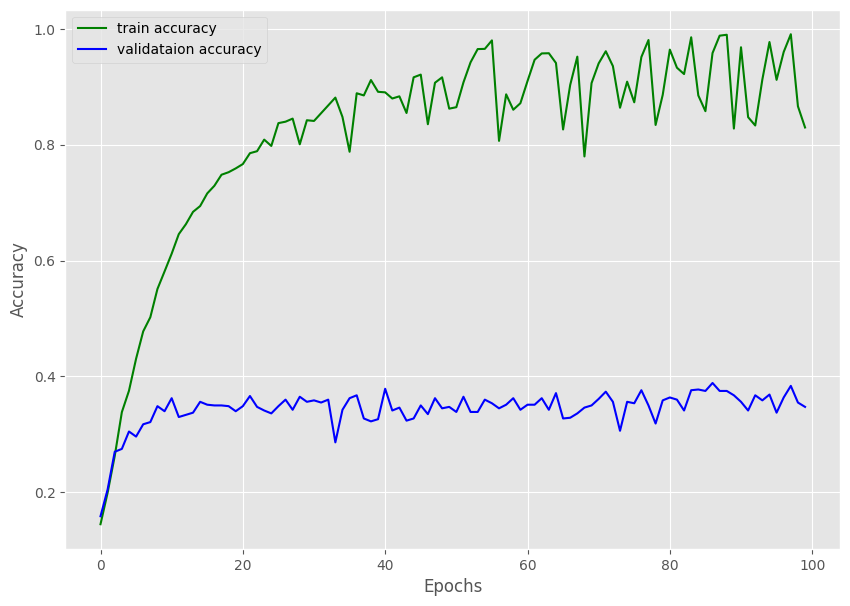

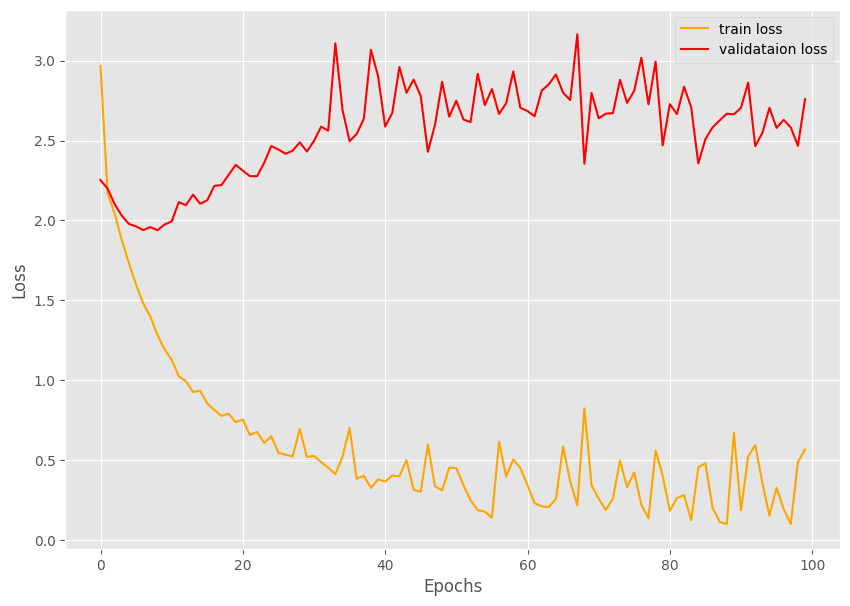

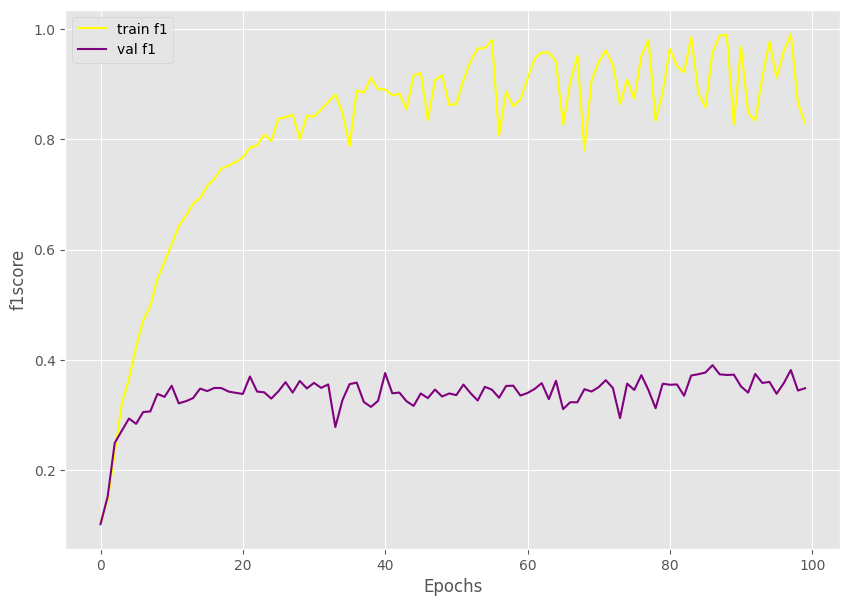

In [95]:
######################################################################
##      Plot train and validation loss, accuracy and f1 graphs      ##
######################################################################
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(
        train_accs, color='green', linestyle='-', 
        label='train accuracy'
    )
plt.plot(
        val_accs, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

    # loss plots
plt.figure(figsize=(10, 7))
plt.plot(
        train_losses, color='orange', linestyle='-', 
        label='train loss'
    )
plt.plot(
        val_losses, color='red', linestyle='-', 
        label='validataion loss'
    )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#f1 plot
plt.figure(figsize=(10, 7))
plt.plot(
        train_f1, color='yellow', linestyle='-', 
        label='train f1'
    )
plt.plot(
        val_f1, color='purple', linestyle='-', 
        label='val f1'
    )
plt.xlabel('Epochs')
plt.ylabel('f1score')
plt.legend()
plt.show()


test    | Loss:2.50e+00 | Acc: 0.36| F1: 0.37|: 100%|█████████████████████████████████| 16/16 [00:00<00:00, 151.28it/s]


<AxesSubplot: >

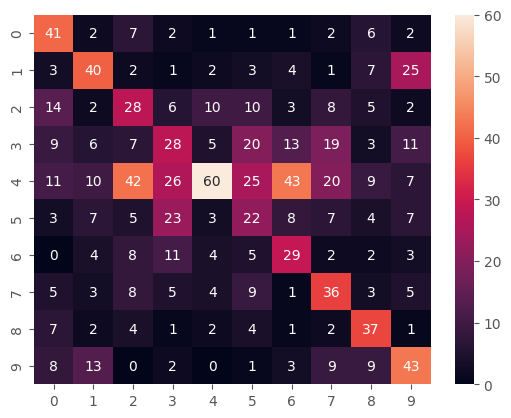

In [100]:
############################################################
##                  Test your best model                  ##
##          Report loss, accuracy and f1 metrics          ##
##      Also plot the confusion matrix for test data      ##
############################################################
total_loss = 0
correct = 0
N = 0
confusion = np.zeros((10, 10))
with tqdm.tqdm(enumerate(test_sampler), total=len(test_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            logprobs = best_model(x)
            loss = np.sum(criterion(logprobs, y))
            total_loss += loss
            N += len(y)
            preds = np.argmax(logprobs, axis=1)
            correct += np.sum((preds == y)) 
            confusion = update_confusion_matrix(confusion, preds, y)
            
            acc = correct/N
            f1 = f1_score(confusion)
            pbar.set_description(f'test    | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
sn.heatmap(confusion, annot=True)
    
   

## Weights Visualization (5 Points)

For the last part we want to visualize weights matrix of the first layer.

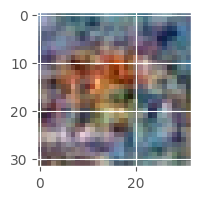

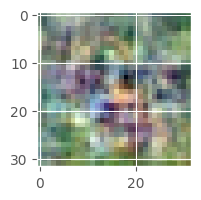

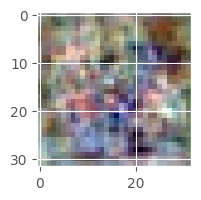

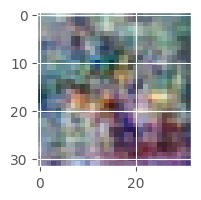

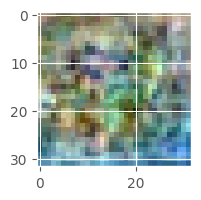

In [105]:
##########################################################
##          Visualize n of first layer weights          ##
##          First reshape them to (32, 32, 3)           ##
##########################################################
n = 5
n = 5
first_layer = best_model.get_parameters()[0]
Ws = first_layer.params['W']
for i in range(n):
    plt.figure(figsize=(2, 2))
    weight = Ws[:, i]
    weight -= np.min(weight)
    weight /= np.max(weight)
    plt.imshow(weight.reshape((32,32,3))) 
    plt.show()
